# HW1 Link

[Ссылка на условие задачи](https://docs.google.com/document/d/1oTOU5FKyvqKIwvN_MnMrL6fj8mWDu7bbuL_t7EZGXHM/edit)

# Часть первая — подготовка данных

In [83]:
!wget https://covid.ourworldindata.org/data/owid-covid-data.csv


--2022-03-07 20:55:15--  https://covid.ourworldindata.org/data/owid-covid-data.csv
Resolving covid.ourworldindata.org (covid.ourworldindata.org)... 104.21.233.137, 104.21.233.138
Connecting to covid.ourworldindata.org (covid.ourworldindata.org)|104.21.233.137|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/csv]
Saving to: ‘owid-covid-data.csv.1’

owid-covid-data.csv     [  <=>               ]  45,28M  6,10MB/s    in 9,0s    

2022-03-07 20:55:24 (5,04 MB/s) - ‘owid-covid-data.csv.1’ saved [47479087]



In [108]:
import warnings
warnings.filterwarnings("ignore")

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from datetime import datetime
from matplotlib import rc

%config InlineBackend.figure_format='retina'

sns.set_style("whitegrid")
sns.set_palette("BrBG")
palette = sns.color_palette()
figsize = (10,5)

rc('font',**{'family':'sans-serif', 'size':7})
rc('figure', **{'dpi': 300})
rc('xtick', labelsize=10) 
rc('ytick', labelsize=10)
rc('legend', fontsize=10)




In [2]:
data = pd.read_csv('owid-covid-data.csv', index_col=0)
data

continent     location        date  total_cases  new_cases  \
iso_code                                                              
AFG           Asia  Afghanistan  2020-02-24          5.0        5.0   
AFG           Asia  Afghanistan  2020-02-25          5.0        0.0   
AFG           Asia  Afghanistan  2020-02-26          5.0        0.0   
AFG           Asia  Afghanistan  2020-02-27          5.0        0.0   
AFG           Asia  Afghanistan  2020-02-28          5.0        0.0   
...            ...          ...         ...          ...        ...   
ZWE         Africa     Zimbabwe  2022-03-02     237503.0      632.0   
ZWE         Africa     Zimbabwe  2022-03-03     237503.0        0.0   
ZWE         Africa     Zimbabwe  2022-03-04     238739.0     1236.0   
ZWE         Africa     Zimbabwe  2022-03-05     239019.0      280.0   
ZWE         Africa     Zimbabwe  2022-03-06     239209.0      190.0   

          new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  \
iso_code                                                                      
AFG                      NaN           NaN         NaN                  NaN   
AFG                      NaN           NaN         NaN                  NaN   
AFG                      NaN           NaN         NaN                  NaN   
AFG                      NaN           NaN         NaN                  NaN   
AFG                      NaN           NaN         NaN                  NaN   
...                      ...           ...         ...                  ...   
ZWE                  416.286        5396.0         1.0                1.143   
ZWE                  362.286        5396.0         0.0                0.857   
ZWE                  467.429        5397.0         1.0                0.714   
ZWE                  459.429        5397.0         0.0                0.571   
ZWE                  486.571        5399.0         2.0                0.857   

          total_cases_per_million  ...  female_smokers  male_smokers  \
iso_code                           ...                                 
AFG                         0.126  ...             NaN           NaN   
AFG                         0.126  ...             NaN           NaN   
AFG                         0.126  ...             NaN           NaN   
AFG                         0.126  ...             NaN           NaN   
AFG                         0.126  ...             NaN           NaN   
...                           ...  ...             ...           ...   
ZWE                     15736.835  ...             1.6          30.7   
ZWE                     15736.835  ...             1.6          30.7   
ZWE                     15818.731  ...             1.6          30.7   
ZWE                     15837.284  ...             1.6          30.7   
ZWE                     15849.873  ...             1.6          30.7   

          handwashing_facilities  hospital_beds_per_thousand  life_expectancy  \
iso_code                                                                        
AFG                       37.746                         0.5            64.83   
AFG                       37.746                         0.5            64.83   
AFG                       37.746                         0.5            64.83   
AFG                       37.746                         0.5            64.83   
AFG                       37.746                         0.5            64.83   
...                          ...                         ...              ...   
ZWE                       36.791                         1.7            61.49   
ZWE                       36.791                         1.7            61.49   
ZWE                       36.791                         1.7            61.49   
ZWE                       36.791                         1.7            61.49   
ZWE                       36.791                         1.7            61.49   

          human_development_index  excess_mortality_cumulative_abs

In [3]:
start = datetime(2020, 3, 3)

rus = data[data['location'] == 'Russia']
cols_to_get = ["date", "total_cases", "new_cases"]
rus = rus[cols_to_get]
rus.date = pd.to_datetime(rus.date)
rus.loc[rus["new_cases"] == 0, "new_cases"] = 1
rus["day"] = (rus["date"] - start).dt.days
rus = rus[rus["date"] >= start]
rus = rus.astype({"new_cases": int, "total_cases": int})
rus.reset_index(drop=True, inplace=True)
labels = rus.date.iloc[::30].dt.strftime('%Y-%m').to_list()
rus.head()

date  total_cases  new_cases  day
0 2020-03-03            3          1    0
1 2020-03-04            3          1    1
2 2020-03-05            4          1    2
3 2020-03-06           13          9    3
4 2020-03-07           13          1    4

In [4]:
train = rus.iloc[:50]
test = rus.iloc[50:]

In [5]:
train

date  total_cases  new_cases  day
0  2020-03-03            3          1    0
1  2020-03-04            3          1    1
2  2020-03-05            4          1    2
3  2020-03-06           13          9    3
4  2020-03-07           13          1    4
5  2020-03-08           17          4    5
6  2020-03-09           17          1    6
7  2020-03-10           20          3    7
8  2020-03-11           20          1    8
9  2020-03-12           28          8    9
10 2020-03-13           45         17   10
11 2020-03-14           59         14   11
12 2020-03-15           63          4   12
13 2020-03-16           90         27   13
14 2020-03-17          114         24   14
15 2020-03-18          147         33   15
16 2020-03-19          199         52   16
17 2020-03-20          253         54   17
18 2020-03-21          306         53   18
19 2020-03-22          367         61   19
20 2020-03-23          438         71   20
21 2020-03-24          495         57   21
22 2020-03-25          658        163   22
23 2020-03-26          840        182   23
24 2020-03-27         1036        196   24
25 2020-03-28         1264        228   25
26 2020-03-29         1534        270   26
27 2020-03-30         1836        302   27
28 2020-03-31         2337        501   28
29 2020-04-01         2777        440   29
30 2020-04-02         3548        771   30
31 2020-04-03         4149        601   31
32 2020-04-04         4731        582   32
33 2020-04-05         5389        658   33
34 2020-04-06         6343        954   34
35 2020-04-07         7497       1154   35
36 2020-04-08         8672       1175   36
37 2020-04-09        10131       1459   37
38 2020-04-10        11917       1786   38
39 2020-04-11        13584       1667   39
40 2020-04-12        15770       2186   40
41 2020-04-13        18328       2558   41
42 2020-04-14        21102       2774   42
43 2020-04-15        24490       3388   43
44 2020-04-16        27938       3448   44
45 2020-04-17        32008       4070   45
46 2020-04-18        36793       4785   46
47 2020-04-19        42853       6060   47
48 2020-04-20        47121       4268   48
49 2020-04-21        52763       5642   49

# Часть вторая

Постройте графики целевых переменных. Вы увидите, что число заболевших растёт очень быстро, на первый взгляд экспоненциально. Для первого подхода к снаряду давайте это и используем.

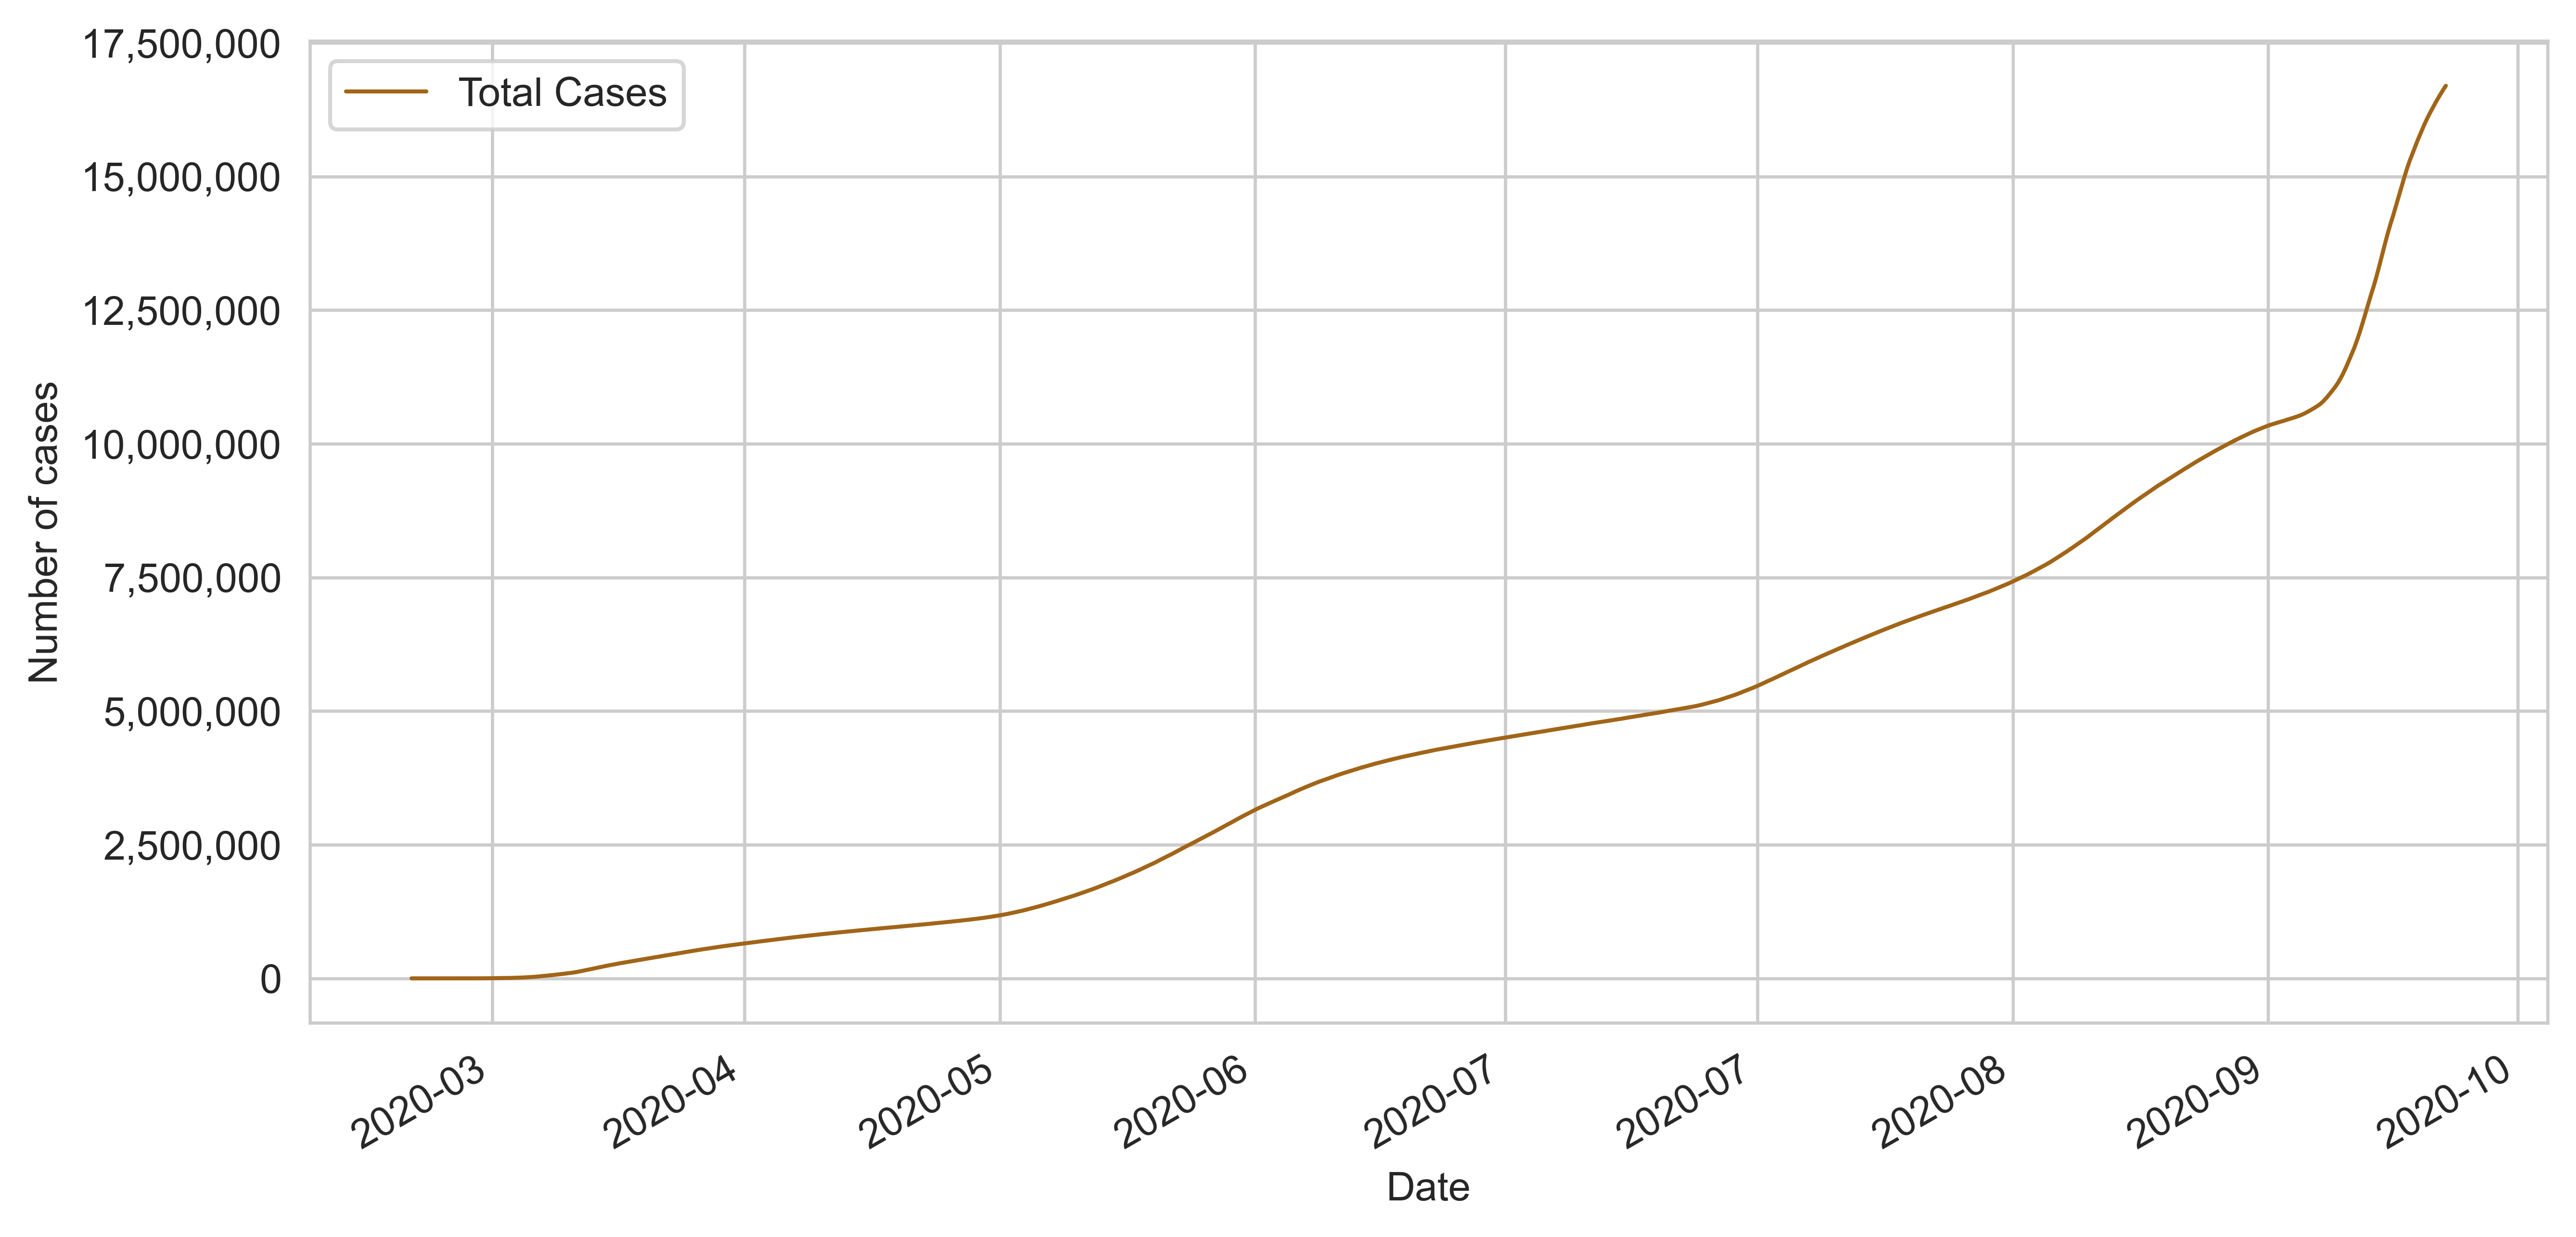

In [26]:
import matplotlib.dates as mdates
import matplotlib.ticker as ticker

fig = plt.figure(figsize=figsize)
ax = fig.add_subplot(111)

ax.plot(pd.to_datetime(rus['date']), rus['total_cases'], linewidth=1, label="Total Cases")
ax.legend()
plt.xlabel("Date", fontsize=10)
plt.ylabel("Number of cases", fontsize=10)
plt.gca().yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
plt.gca().xaxis.set_major_formatter(ticker.FixedFormatter(labels))
plt.gcf().autofmt_xdate()

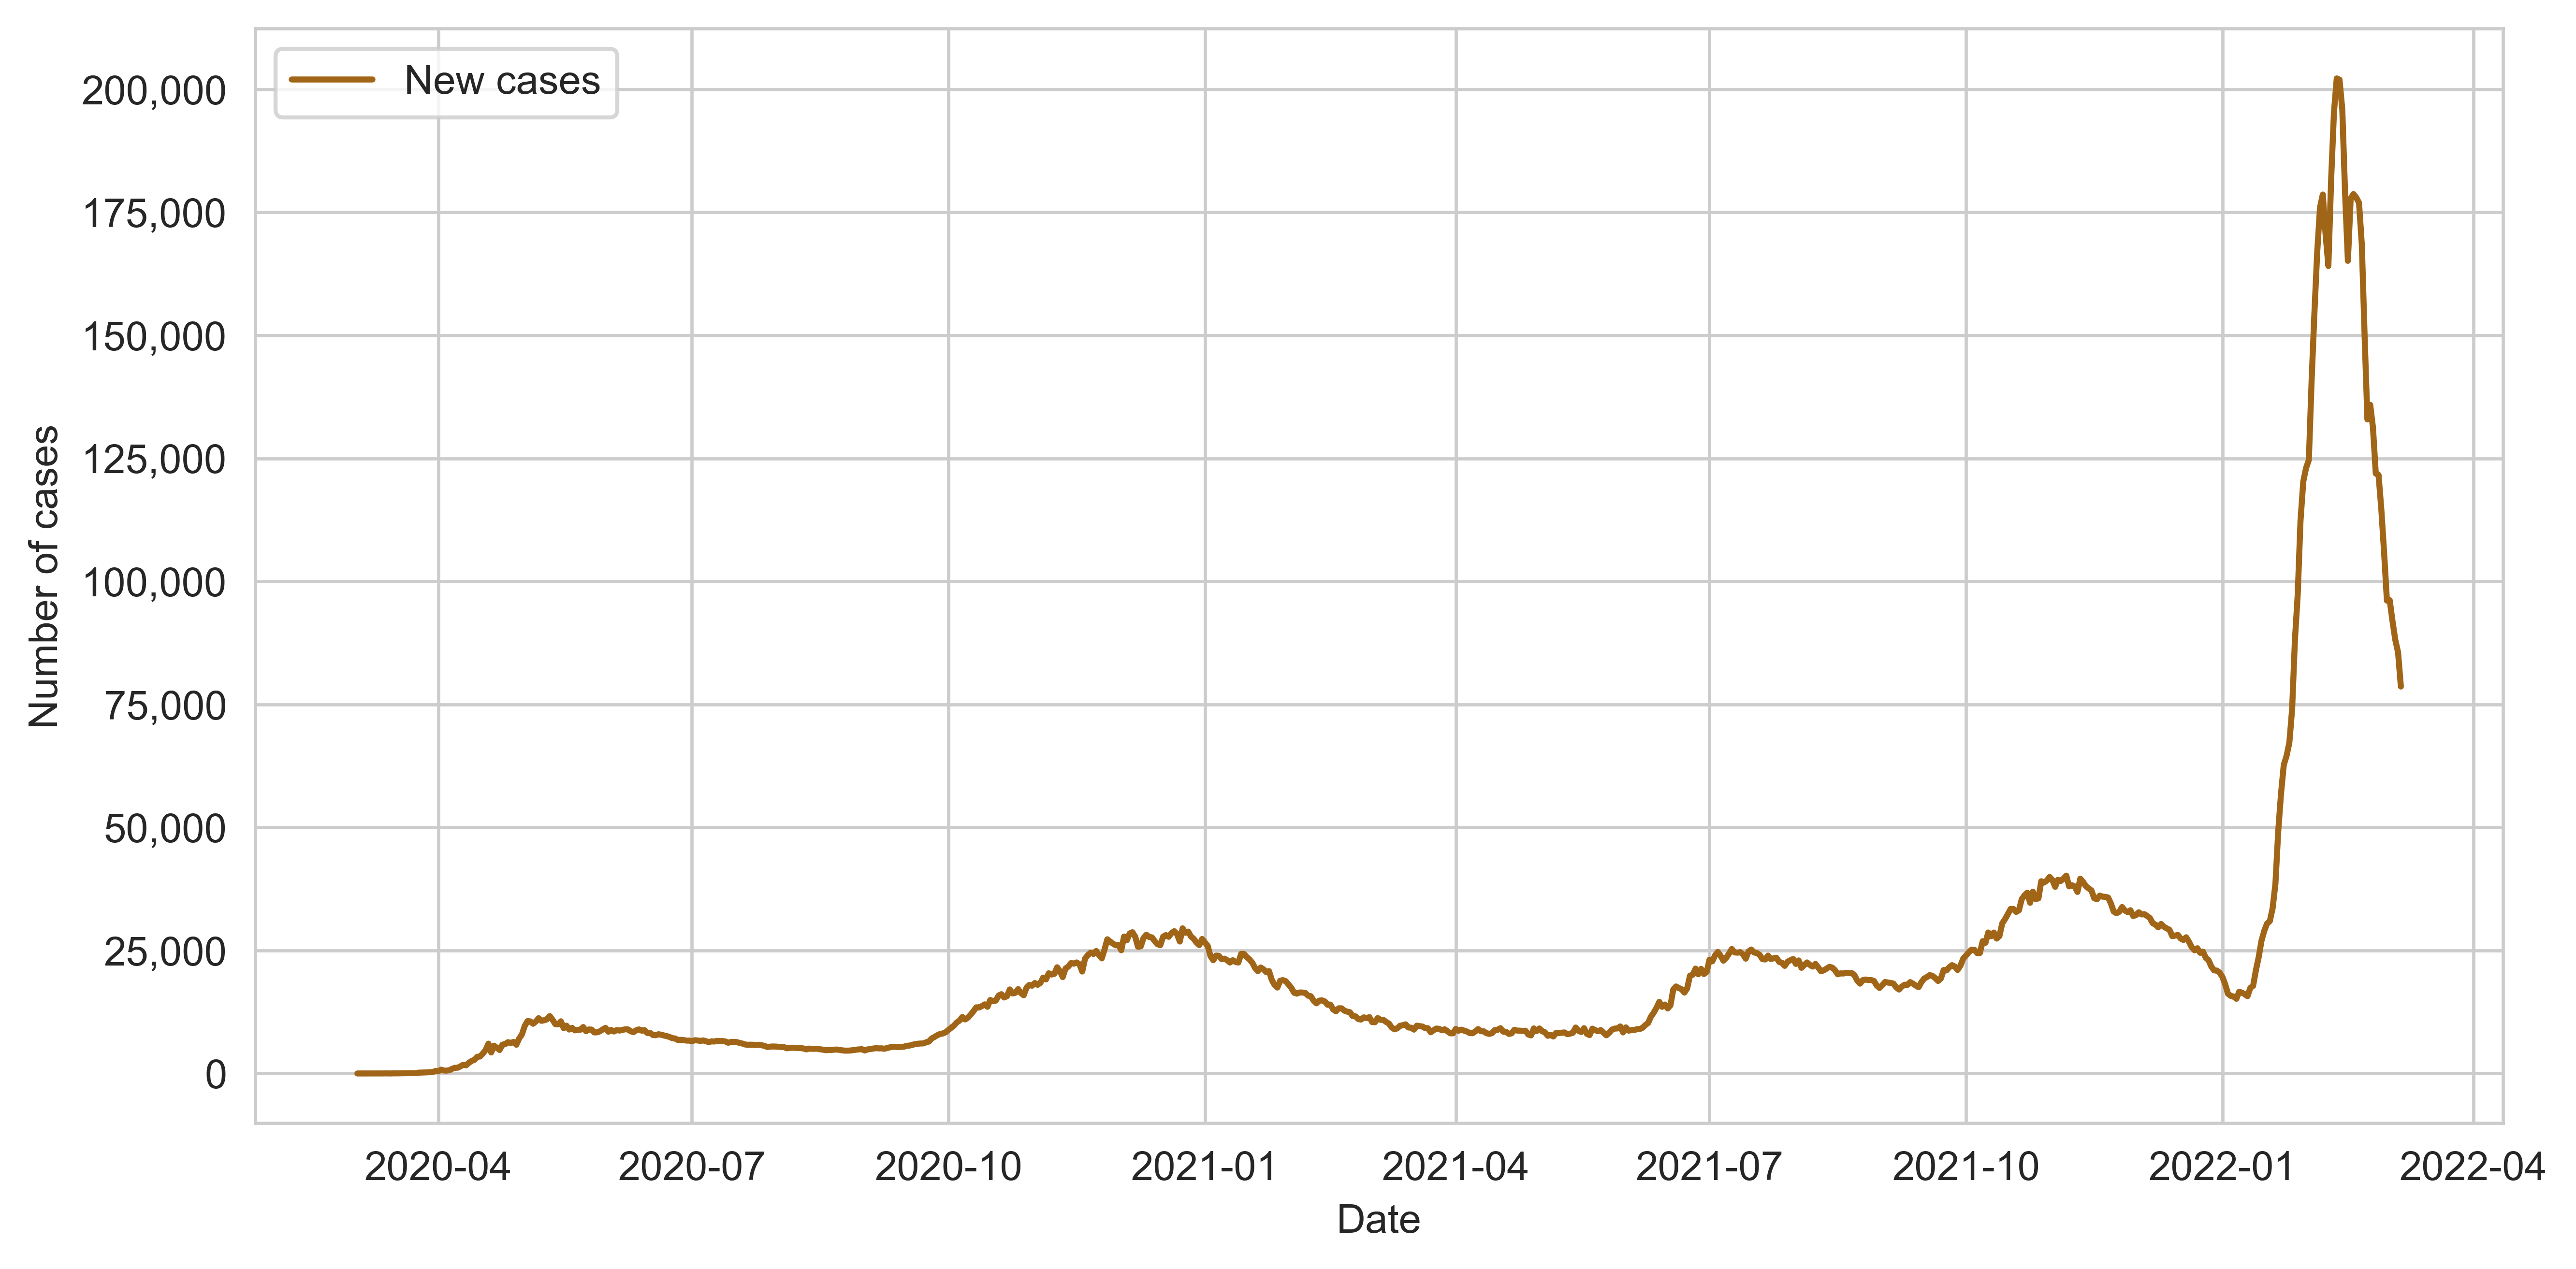

In [43]:
plt.figure(figsize=figsize)
plt.plot(rus["date"], rus["new_cases"], label="New cases")
plt.xlabel("Date", fontsize=10)
plt.ylabel("Number of cases", fontsize=10)
plt.gca().yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
plt.legend(fontsize=10);

# 2.a

Используя линейную регрессию, обучите модель с экспоненциальным ростом числа заболевших: y ~ exp(линейная функция от x), где x — номер текущего дня.

Пусть функция заболевших будет представлена в виде:

$$y \sim e^{kx+b}$$

Прологарифмируем:

$$log(y) \sim log(e^{kx+b}) = kx + b$$

Обучим модель с единственным признаком — номером текущего дня, и целевой переменной — логарифмом числа заболевших.

In [32]:
from scipy.stats import multivariate_normal
from sklearn.linear_model import LinearRegression, Ridge


In [35]:
model = LinearRegression()

model.fit(train["day"].values.reshape(-1, 1), np.log(train["total_cases"]));

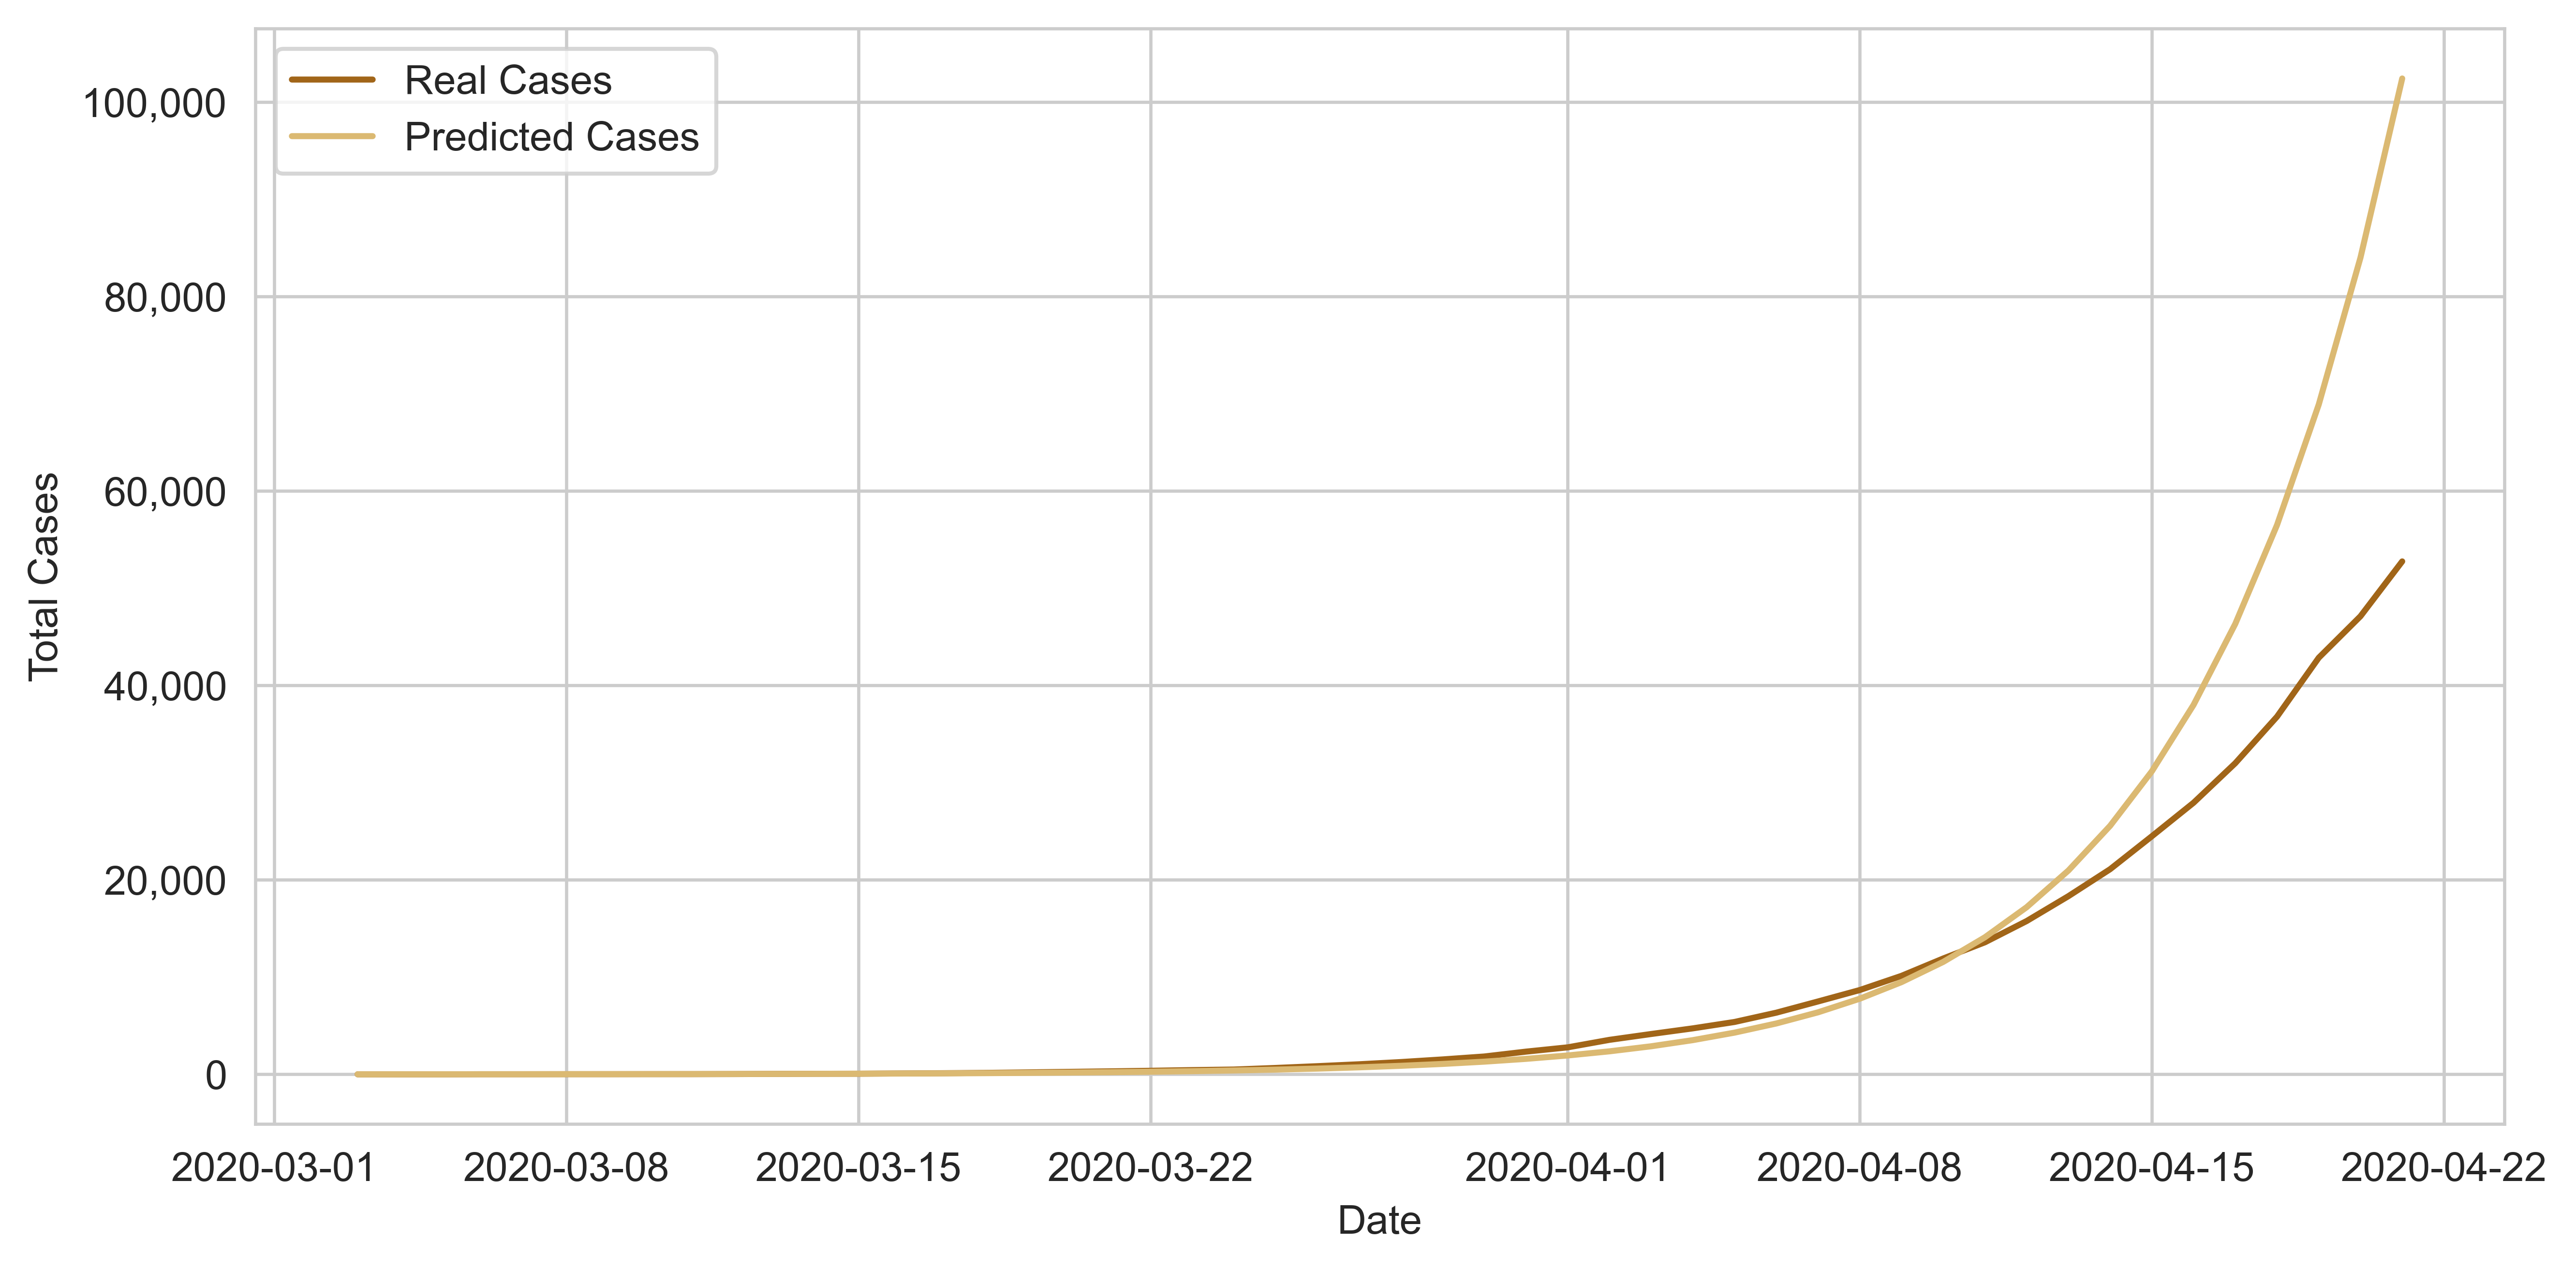

In [42]:
prediction = model.predict(train["day"].values.reshape(-1, 1))

plt.figure(figsize=figsize)
plt.plot(train["date"], train["total_cases"], label="Real Cases")
plt.plot(train["date"], np.exp(prediction), label="Predicted Cases")
plt.gca().yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
plt.grid(True)
plt.xlabel("Date", fontsize=10)
plt.ylabel("Total Cases", fontsize=10)
plt.legend(fontsize=10);

# 2.b

Найдите апостериорное распределение параметров этой модели для достаточно широкого априорного распределения. Требующееся для этого значение дисперсии шума в данных оцените, исходя из вашей же максимальной апостериорной модели (это фактически первый шаг эмпирического Байеса).

In [92]:
def bayesian_update(mu, sigma, x, y, sigma_noise):
    sigma_n = np.linalg.inv(np.linalg.inv(sigma) + (1 / (sigma_noise ** 2)) *
                            np.matmul(np.transpose(x), x) )
    mu_n = np.matmul(sigma_n,
                     np.matmul(np.linalg.inv(sigma), np.transpose(mu)) +
                     (1 / (sigma_noise ** 2)) * np.matmul(np.transpose(x), y))
    return mu_n, sigma_n


In [97]:
x = np.column_stack([np.ones(train.shape[0]), train["day"]])

mu, sigma = bayesian_update(np.zeros(2), 1000 * np.eye(2), x, np.log(train["total_cases"]).values, sigma_noise)
mu, sigma

(array([1.82073506, 0.19829098]),
 array([[ 1.15248767e-03, -3.49238688e-05],
        [-3.49238688e-05,  1.42546446e-06]]))

# 2.c

Посэмплируйте много разных экспонент, постройте графики. Сколько, исходя из этих сэмплов, предсказывается случаев коронавируса в России к 1 мая? к 1 июня? к 1 сентября? Постройте предсказательные распределения (можно эмпирически, исходя из данных сэмплирования).



In [98]:
n = 500
w = np.random.multivariate_normal(mu, sigma, n)

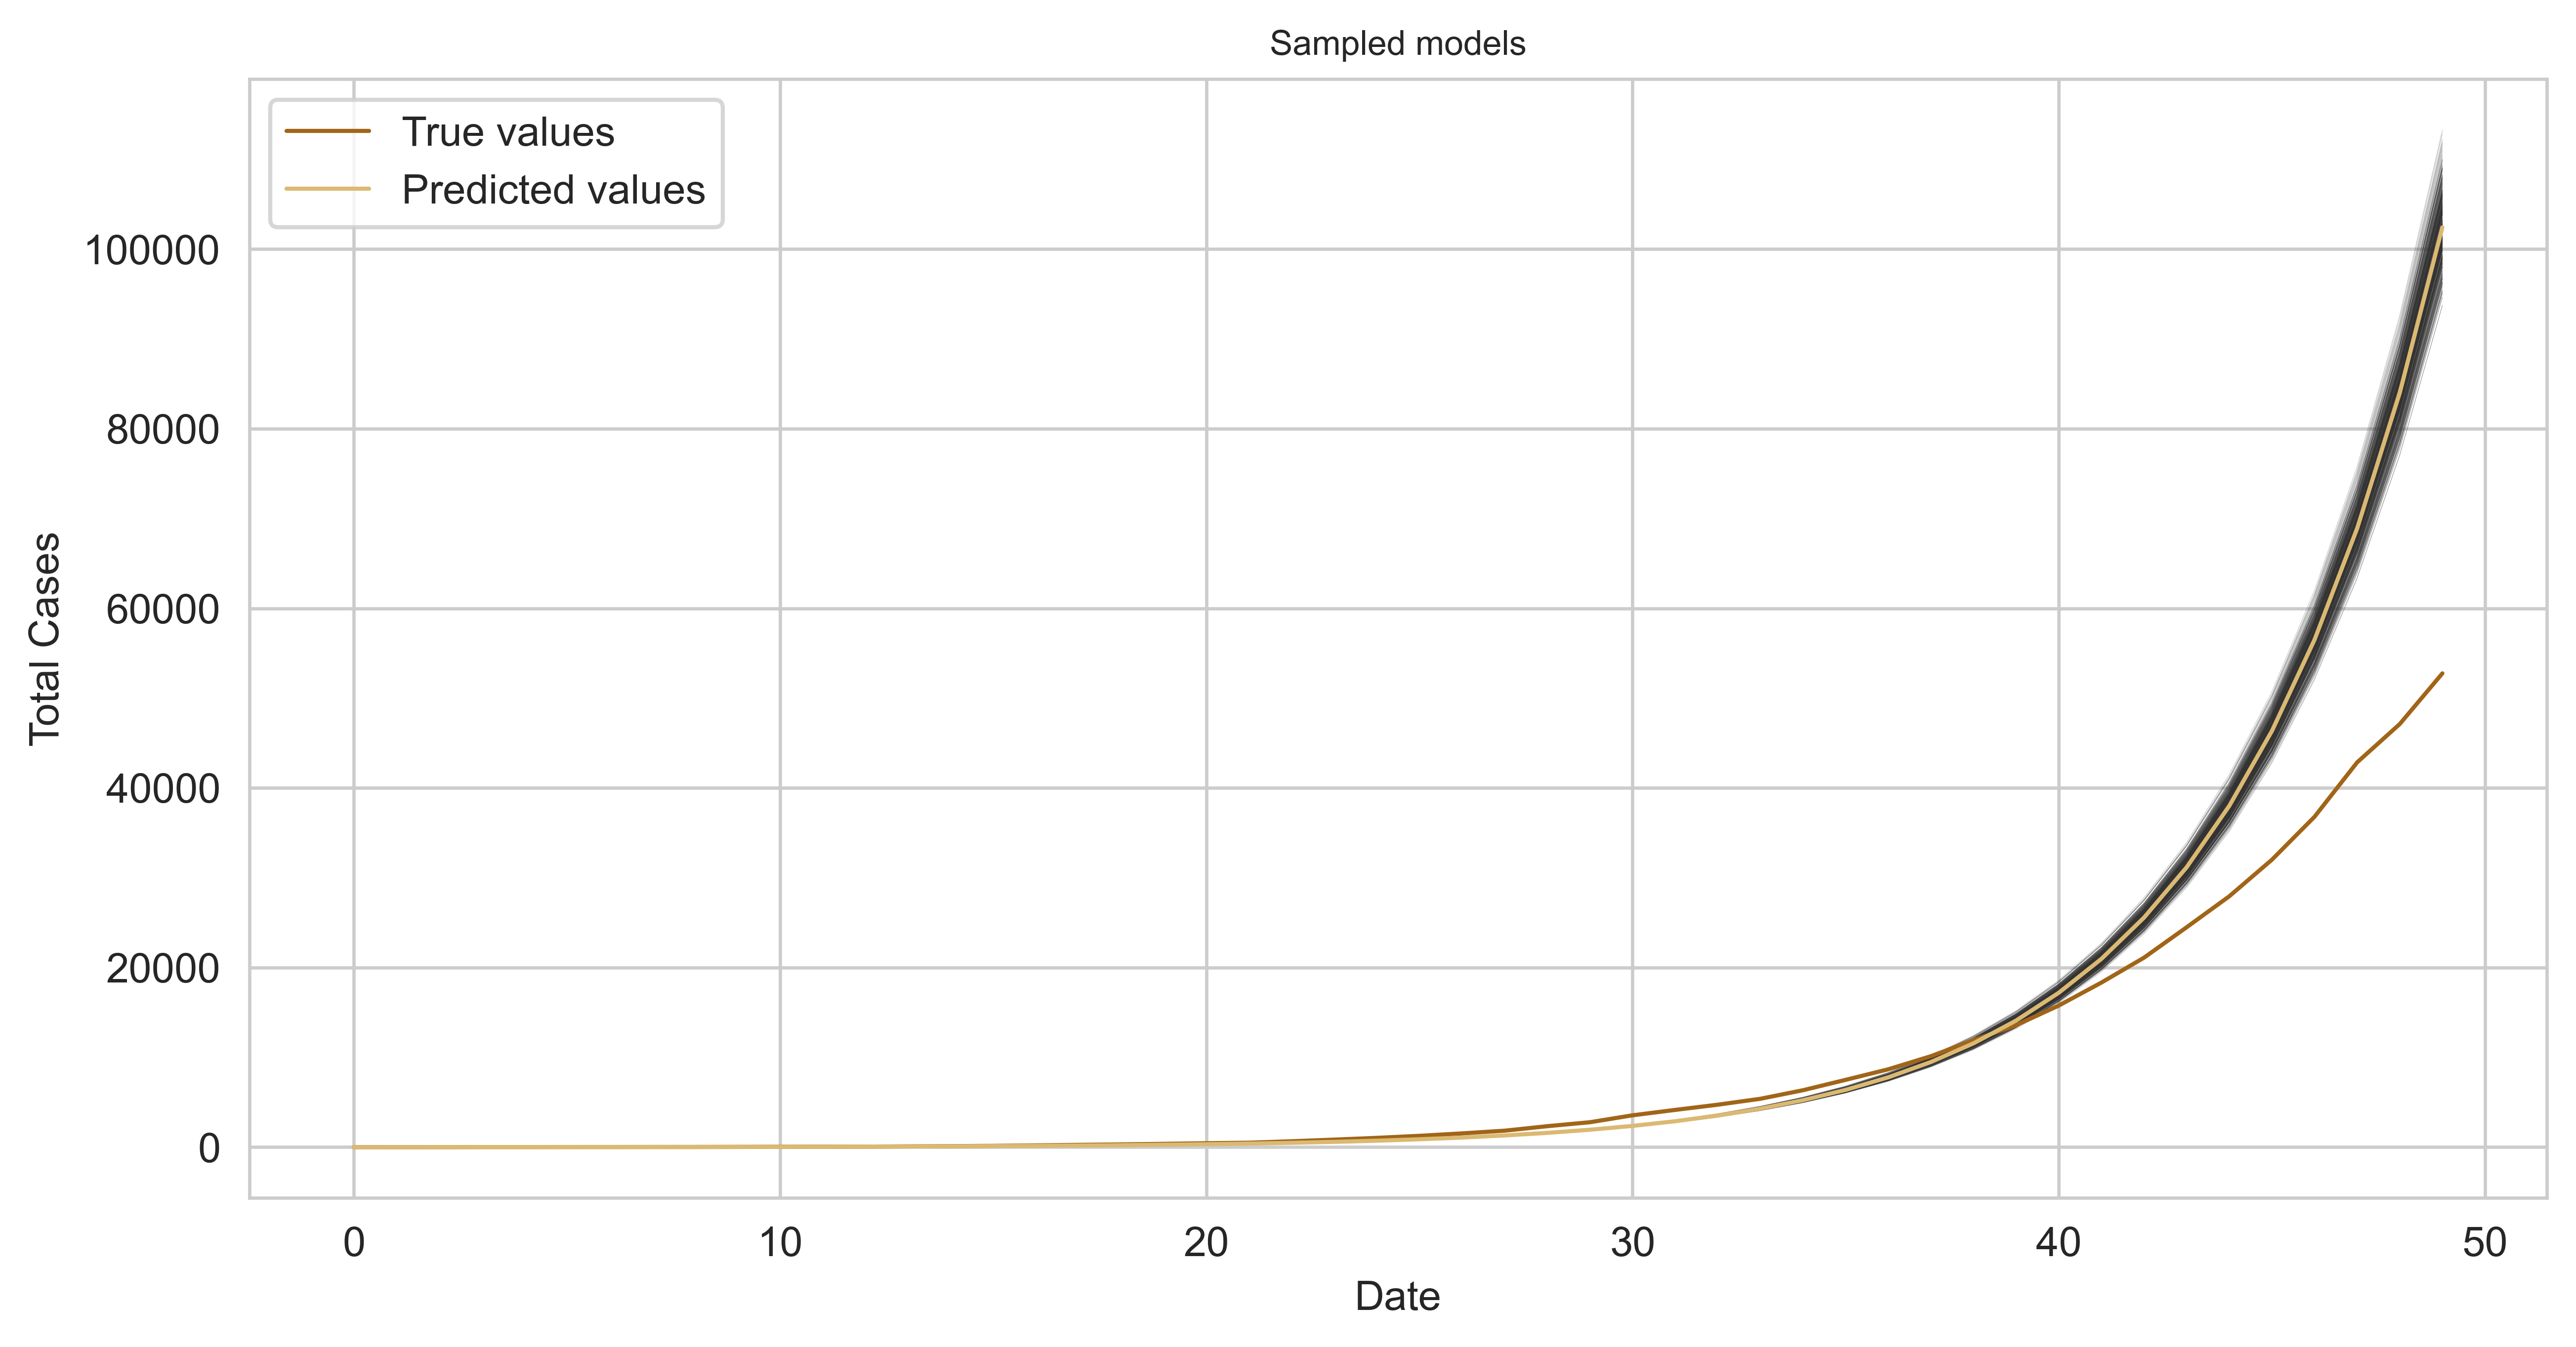

In [107]:
plt.figure(figsize=figsize)
plt.title("Sampled models")
# Sampled exponents:
for i in range(n):
    plt.plot(train["day"], np.exp(x.dot(w[i])), color="0.2", alpha=0.4, linewidth=.1)
# True values:
plt.plot(train["day"], train["total_cases"], label="True values", linewidth=1)
# Predicted values:
plt.plot(train["day"], np.exp(prediction), label="Predicted values", linewidth=1)

plt.xlabel("Date", fontsize=10)
plt.ylabel("Total Cases", fontsize=10)
plt.legend(fontsize=10);

In [112]:
START_DATE = datetime(2020, 3, 3)
MAY_FIRST = (datetime(2020, 5, 1) - START_DATE).days
JUNE_FIRST = (datetime(2020, 6, 1) - START_DATE).days
SEPTEMBER_FIRST = (datetime(2020, 9, 1) - START_DATE).days

                     
x = pd.Series([MAY_FIRST, JUNE_FIRST, SEPTEMBER_FIRST])

x_matrix = np.column_stack([np.ones(len(x)), x])

prediction = np.exp(w.dot(x_matrix.T))

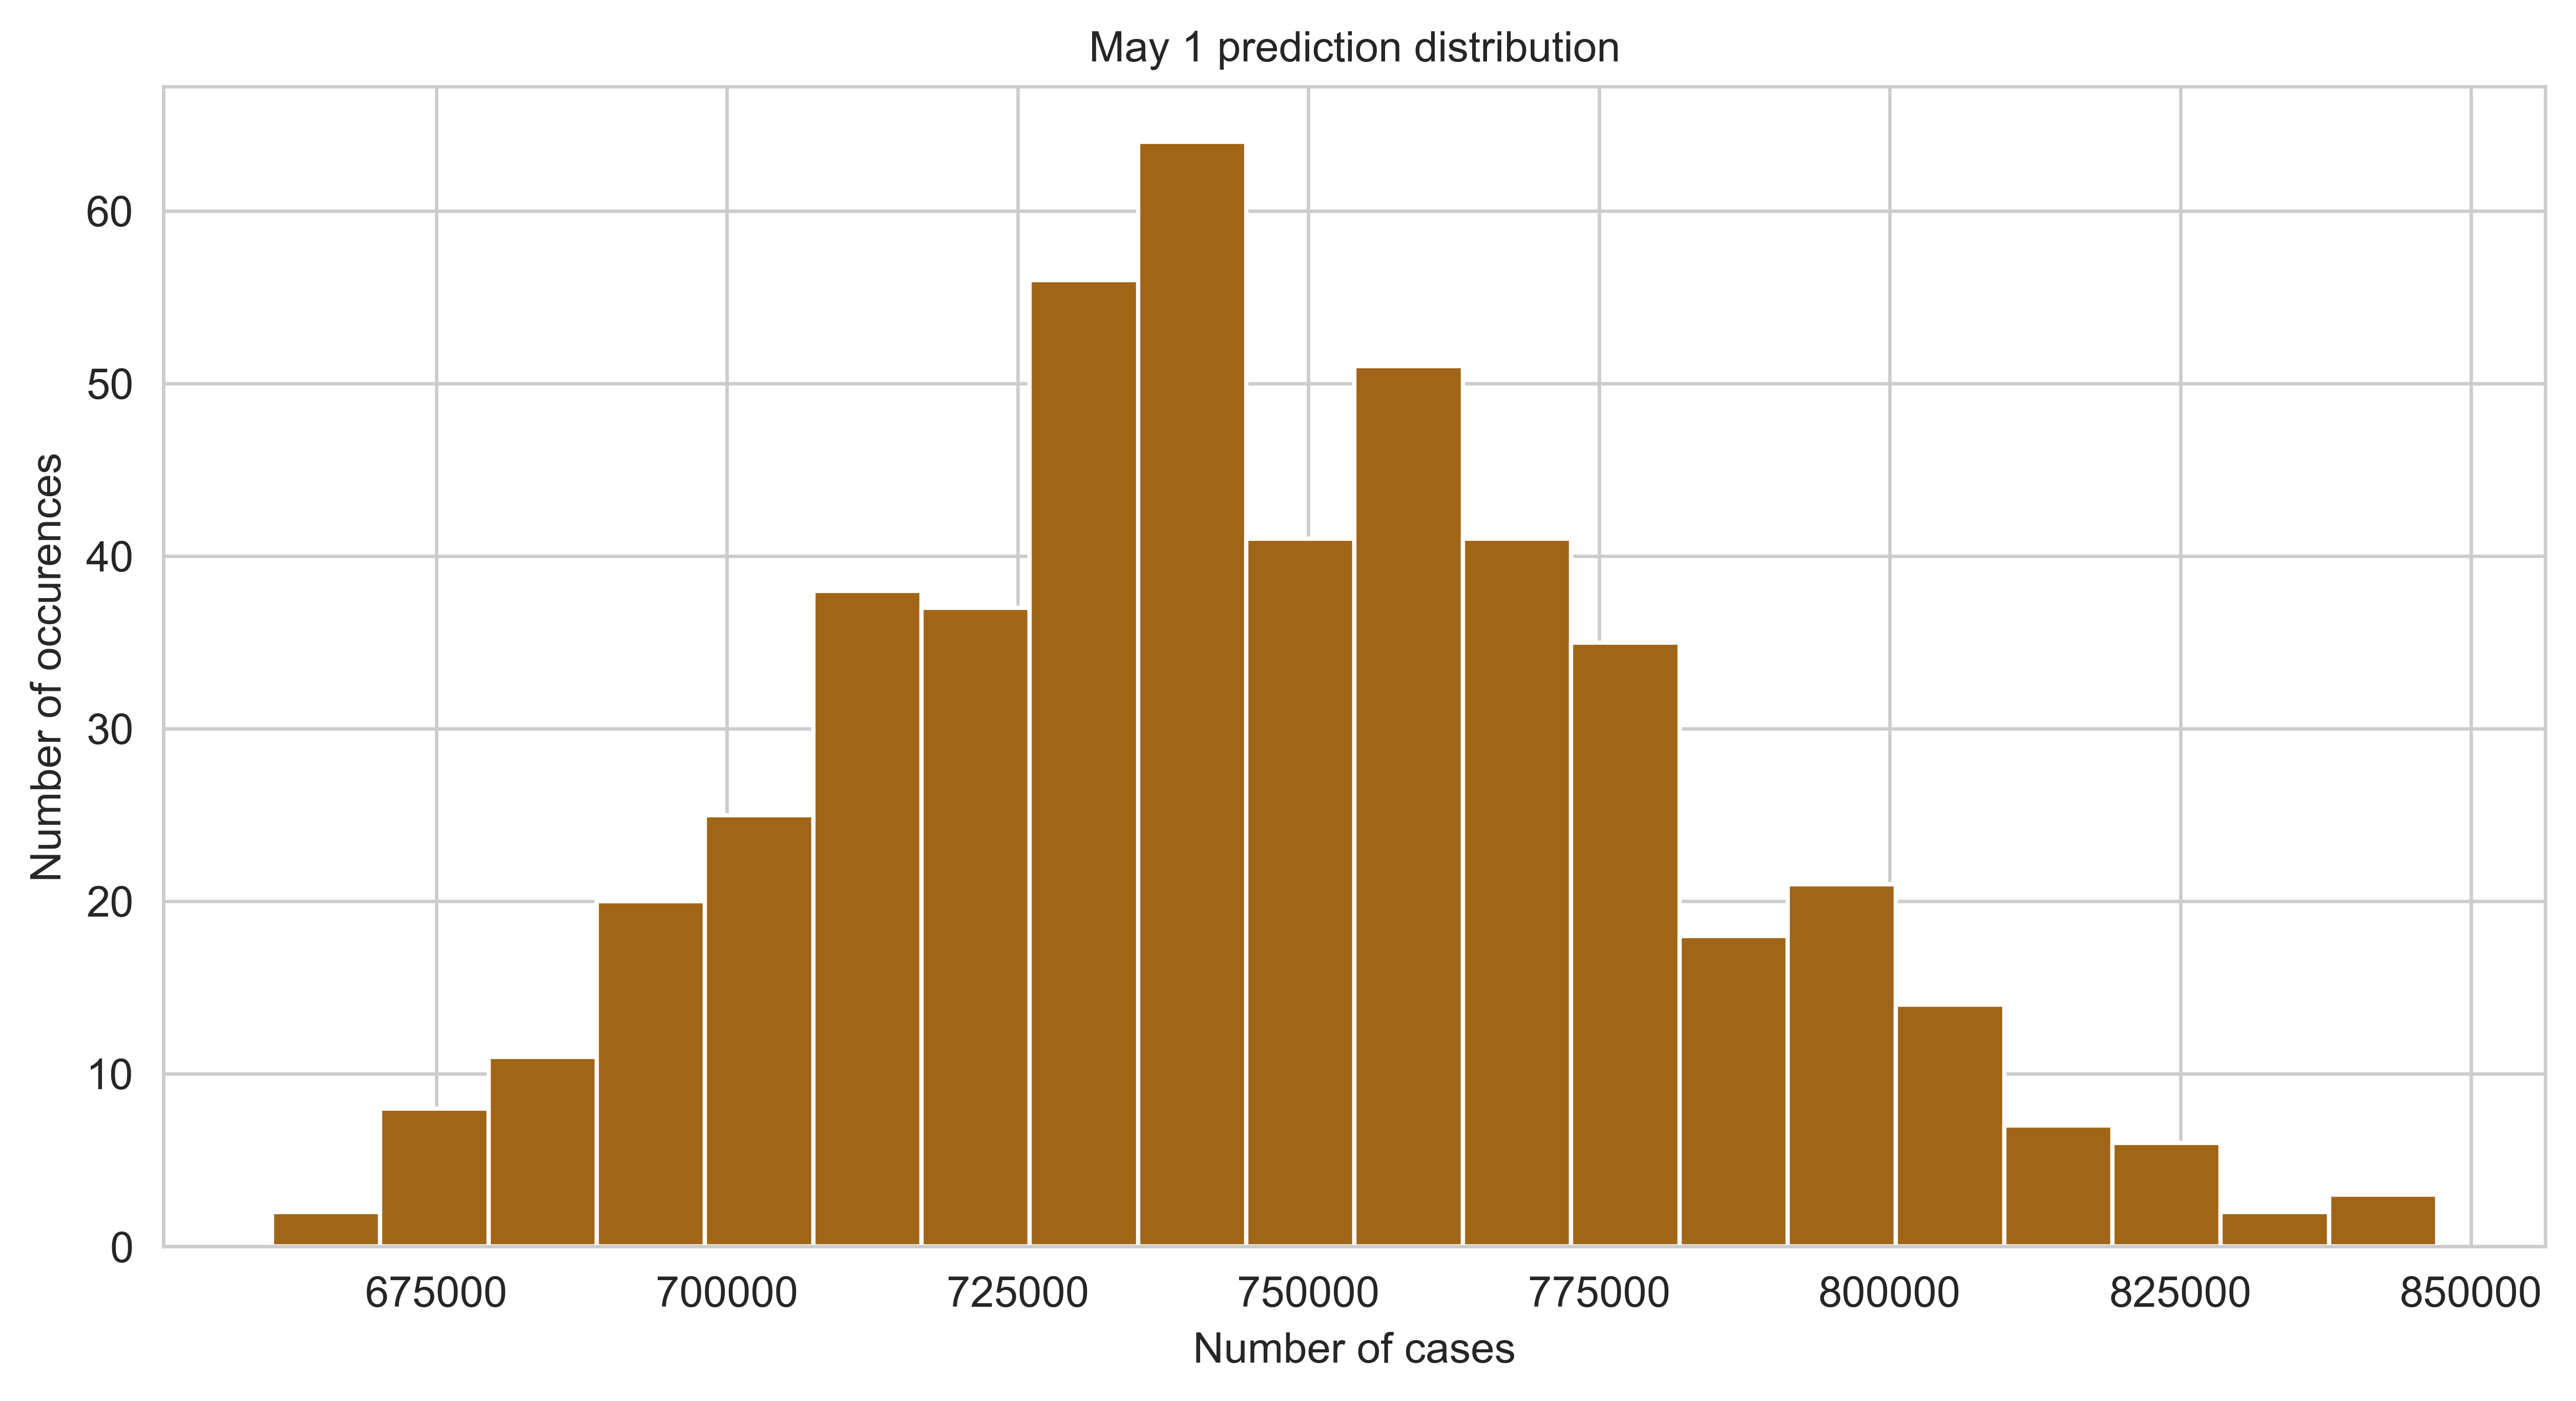

In [125]:
plt.figure(figsize=figsize)
plt.hist(prediction[:, 0], bins=20)
plt.xlabel("Number of cases", size=10)
plt.ylabel("Number of occurences", size=10)
plt.title("May 1 prediction distribution", size=10);

In [129]:
print(f"Median:\t\t{round(np.quantile(prediction[:, 0], 0.5))}")
print(f"10-quantile:\t{round(np.quantile(prediction[:, 0], 0.1))}")
print(f"90-quantile:\t{round(np.quantile(prediction[:, 0], 0.9))}")
print(f"True value:\t" f"{test[test['day'] == MAY_FIRST]['total_cases'].iloc[0]}")


Median:		742767
10-quantile:	703359
90-quantile:	792548
True value:	114431


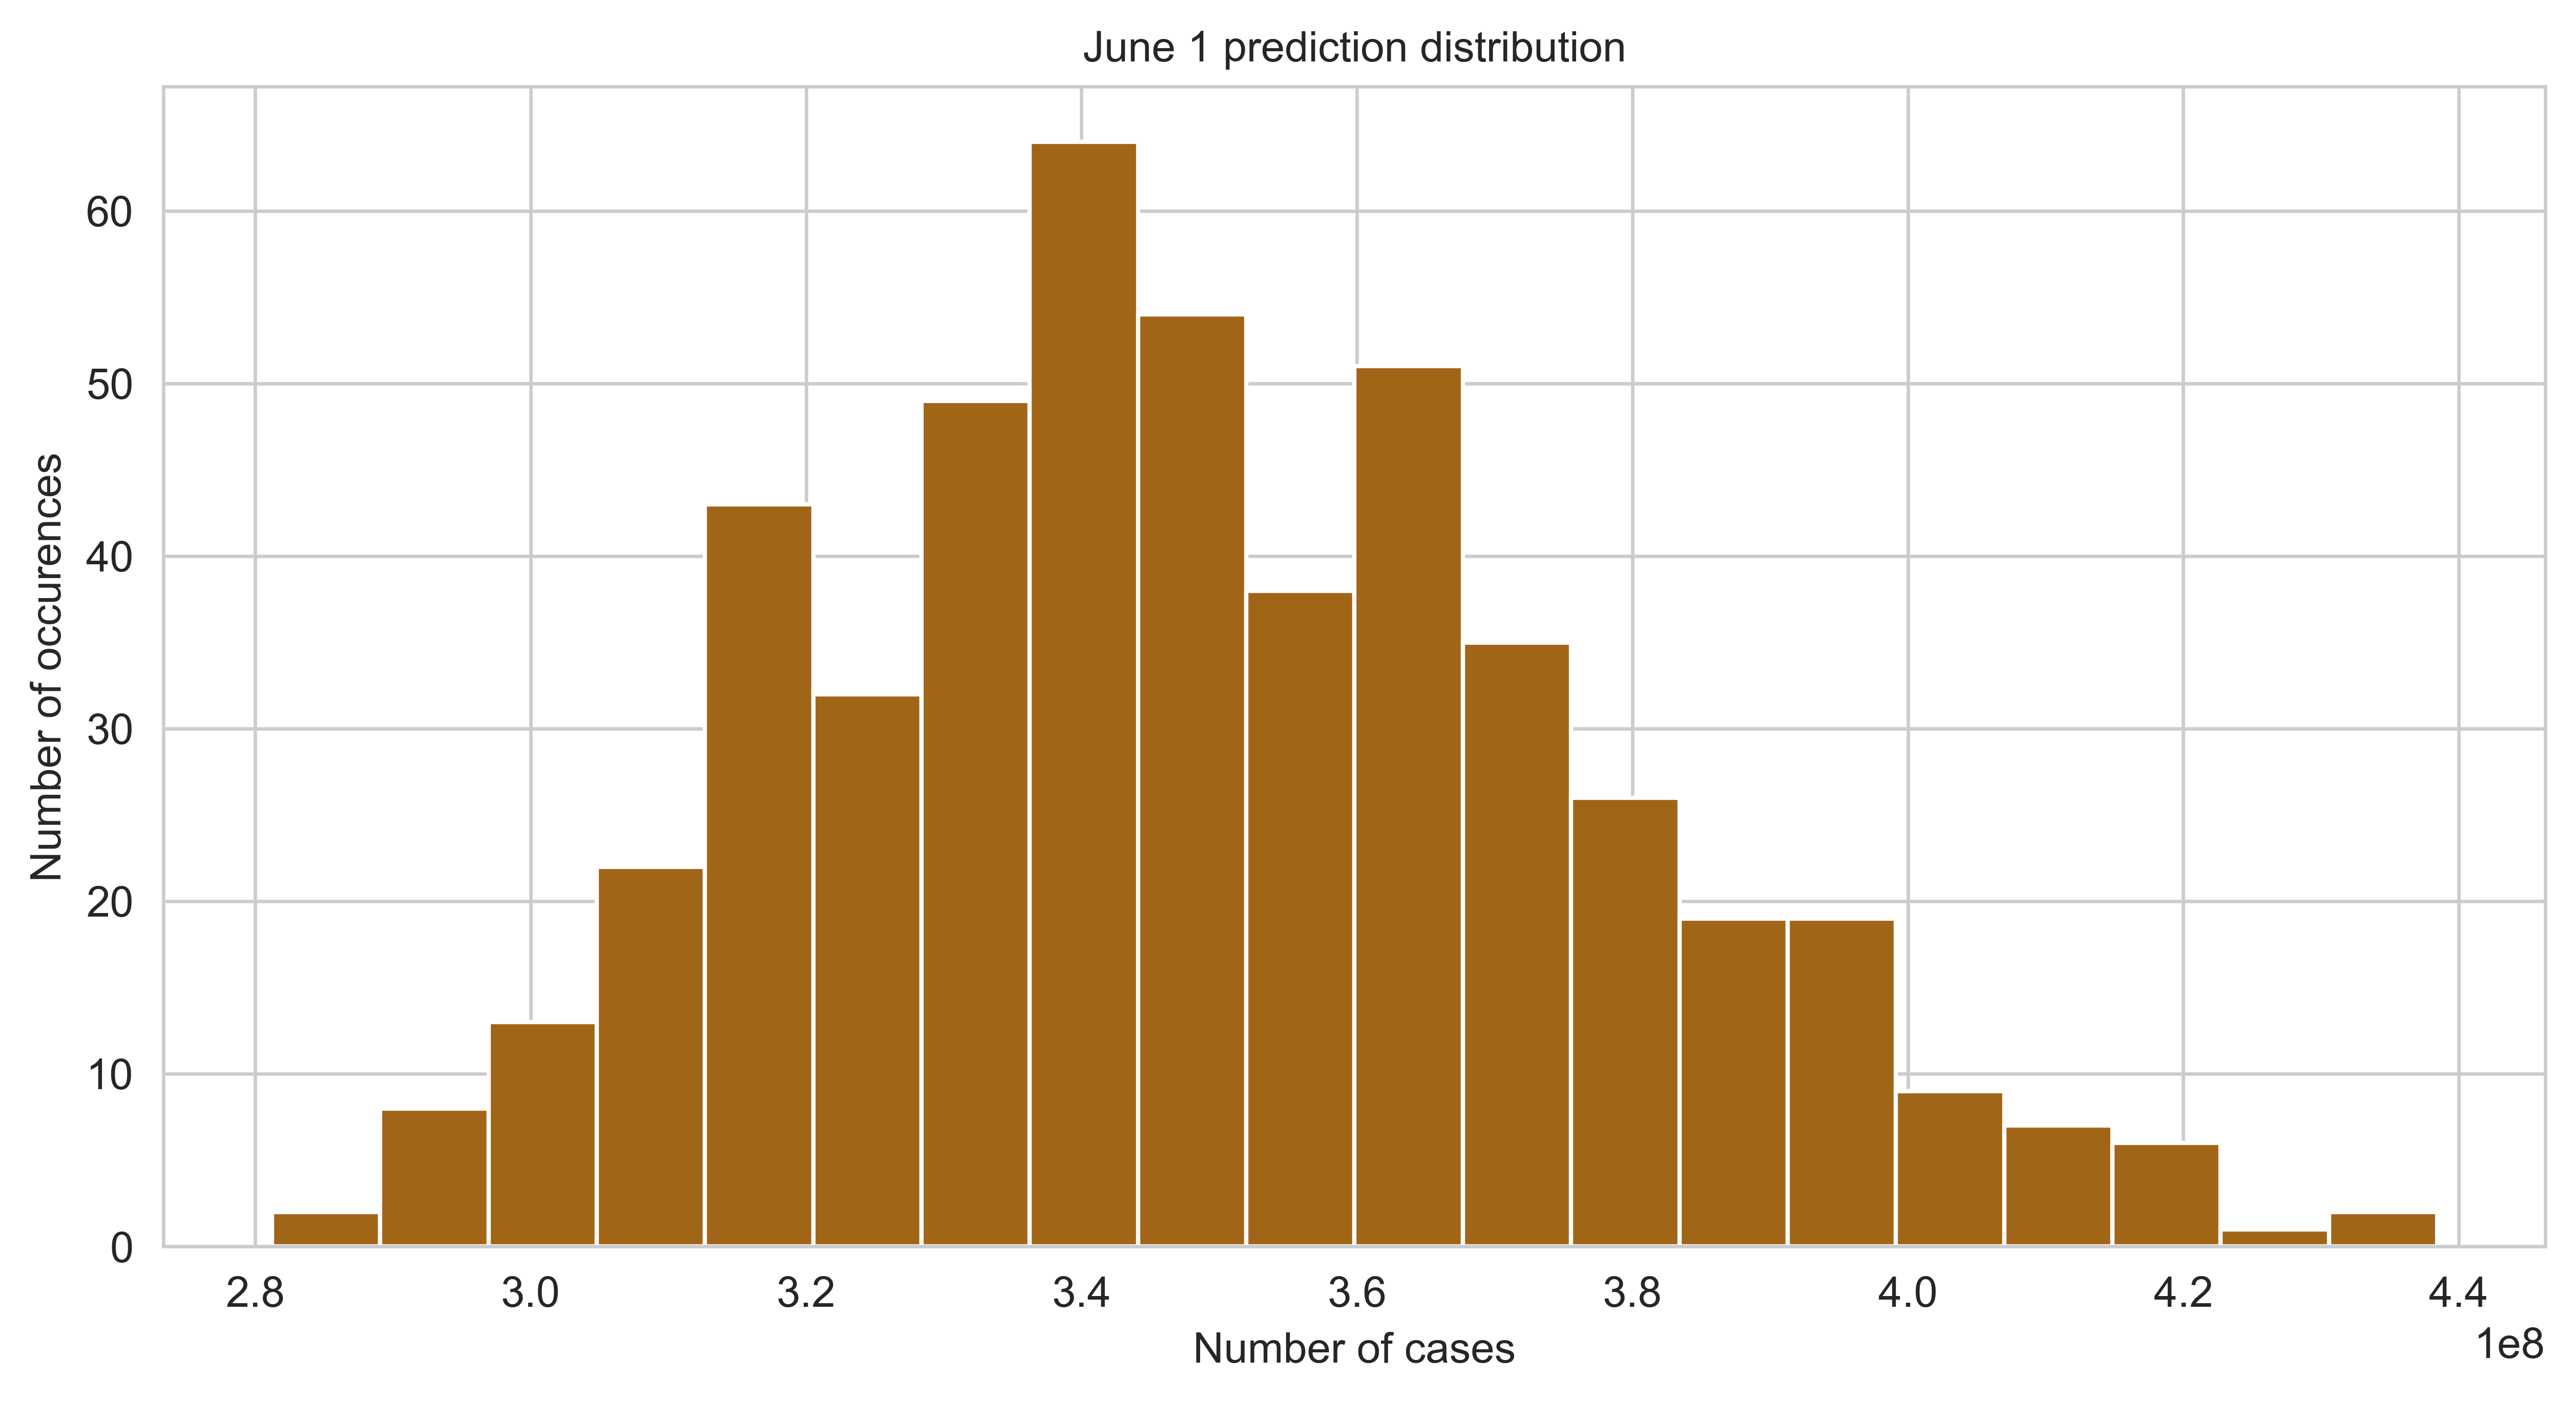

In [130]:
plt.figure(figsize=figsize)
plt.hist(prediction[:, 1], bins=20)
plt.xlabel("Number of cases", size=10)
plt.ylabel("Number of occurences", size=10)
plt.title("June 1 prediction distribution", size=10);

In [131]:
print(f"Median:\t\t{round(np.quantile(prediction[:, 1], 0.5))}")
print(f"10-quantile:\t{round(np.quantile(prediction[:, 1], 0.1))}")
print(f"90-quantile:\t{round(np.quantile(prediction[:, 1], 0.9))}")
print(f"True value:\t" f"{rus[rus['day'] == JUNE_FIRST]['total_cases'].iloc[0]}")

Median:		347985424
10-quantile:	313475976
90-quantile:	389988367
True value:	414328


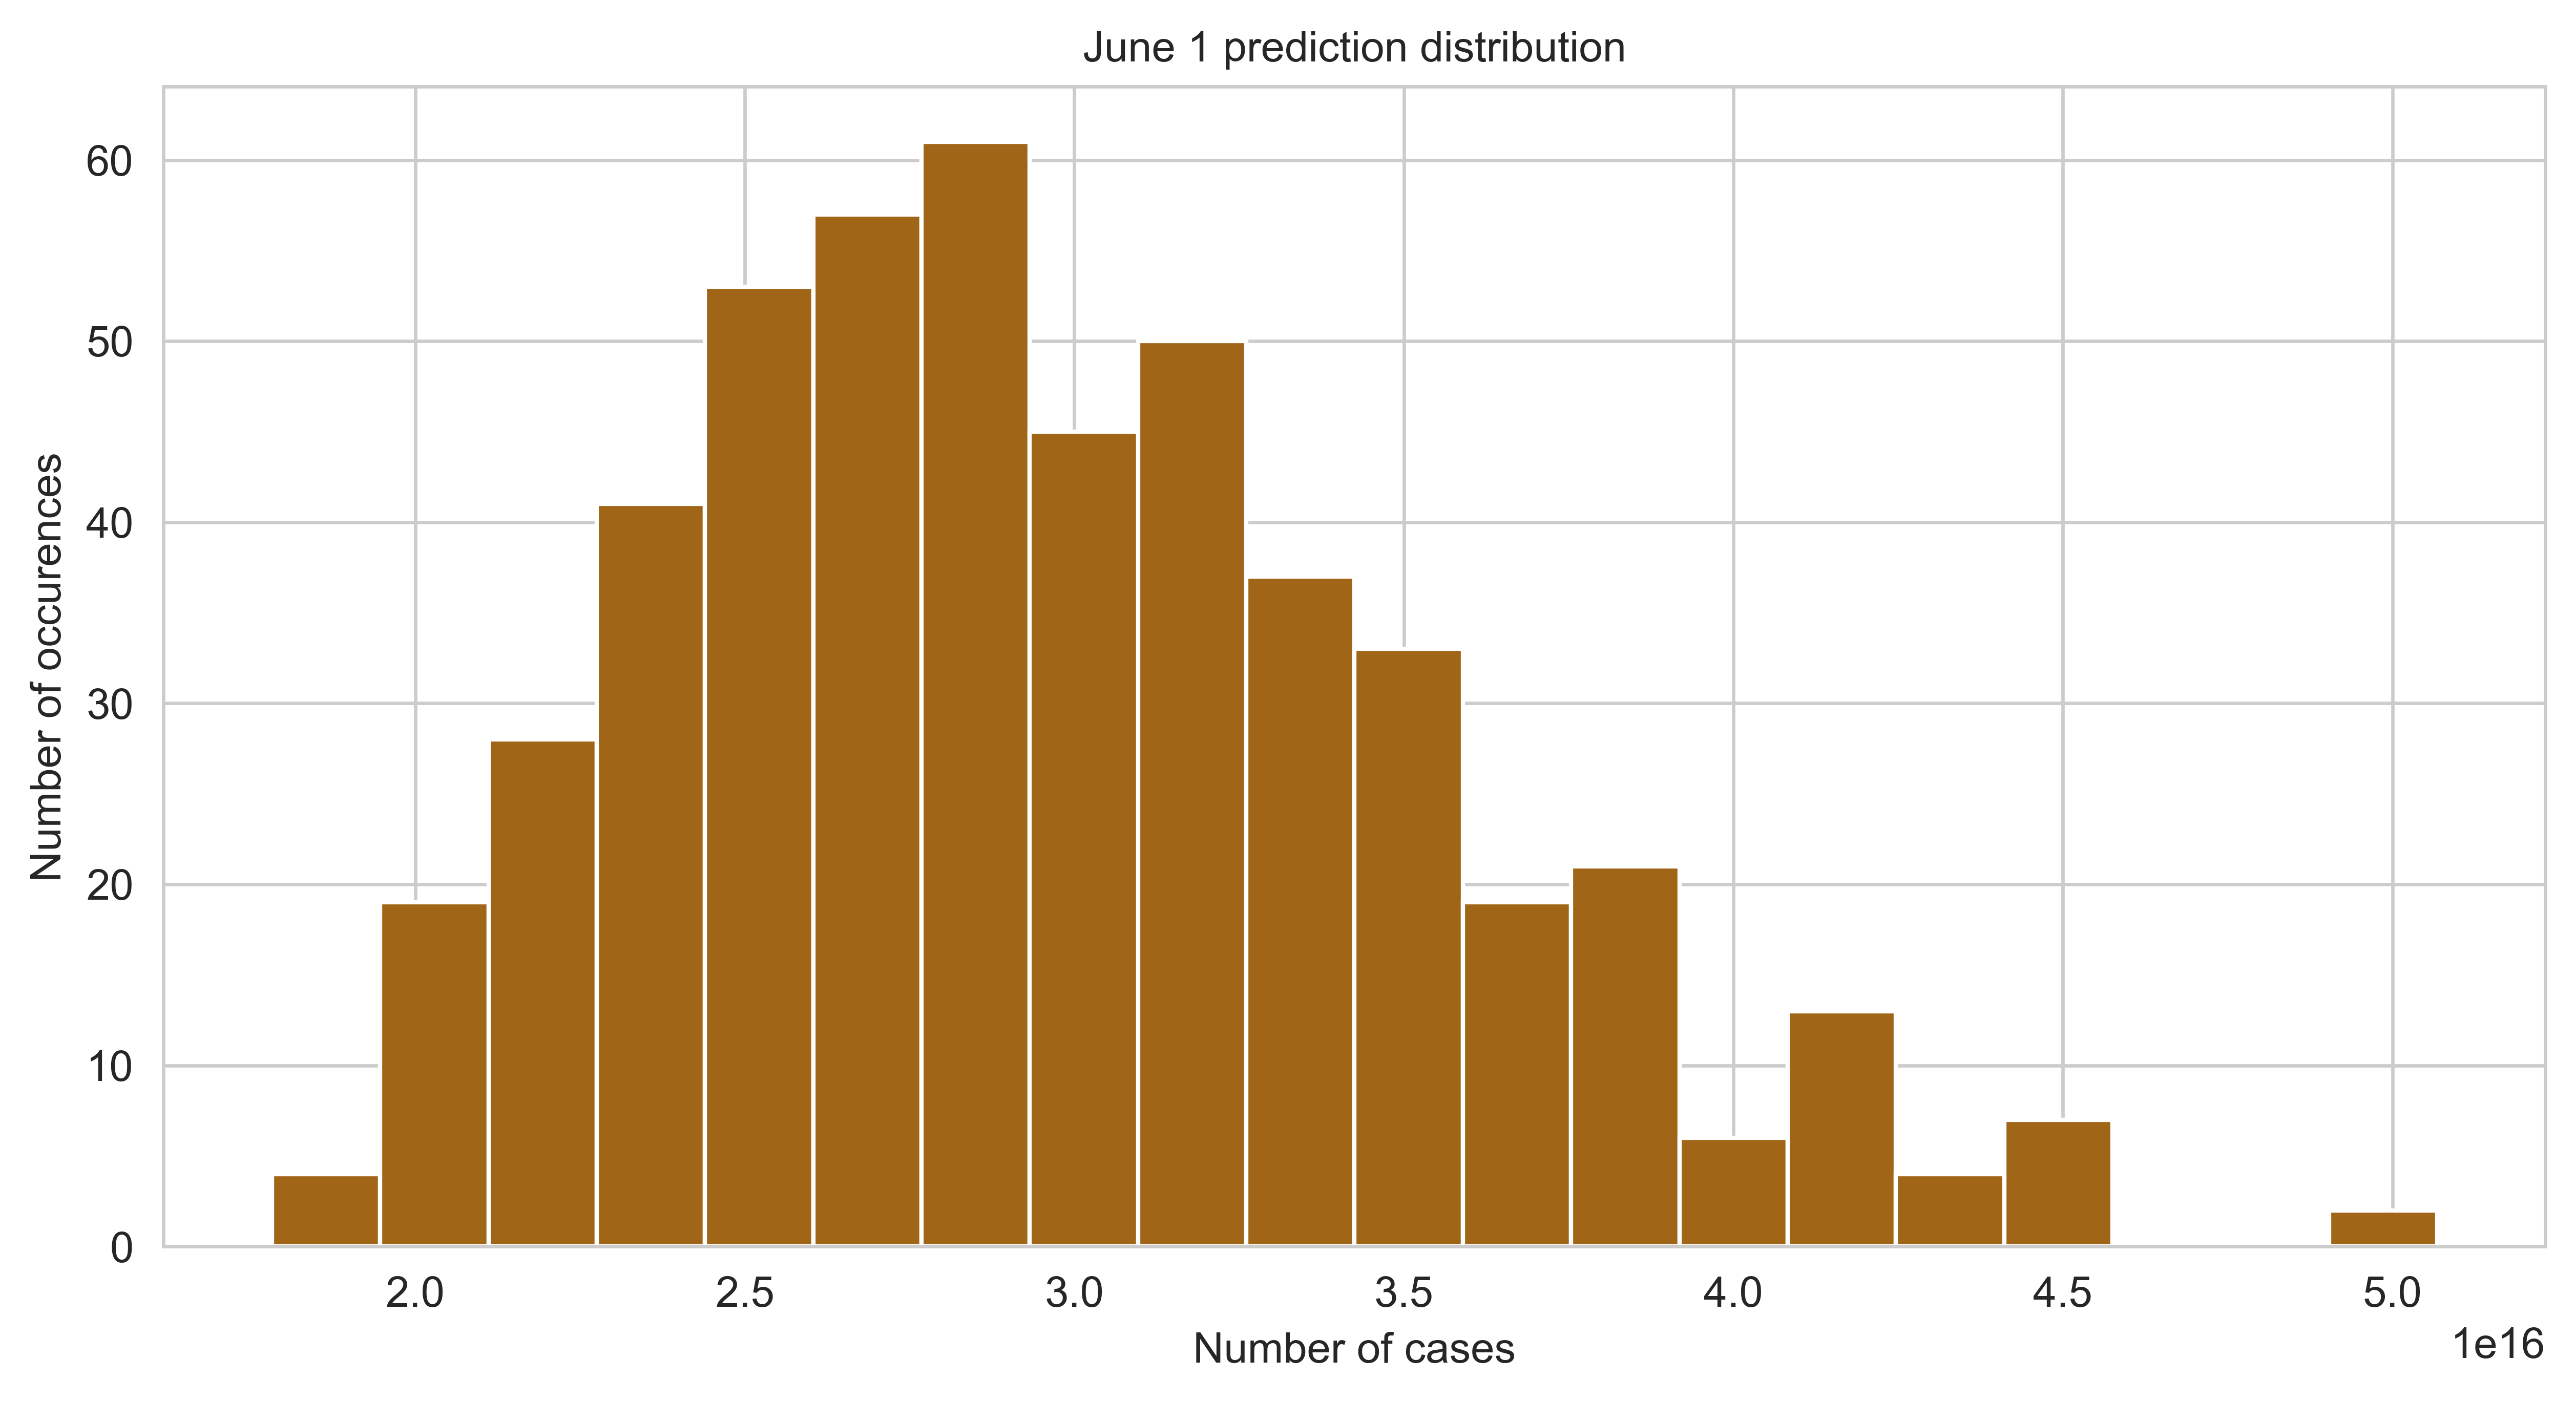

In [133]:
plt.figure(figsize=figsize)
plt.hist(prediction[:, 2], bins=20)
plt.xlabel("Number of cases", size=10)
plt.ylabel("Number of occurences", size=10)
plt.title("June 1 prediction distribution", size=10);

In [137]:
# Prediction for September 1
print(f"Median:\t\t{round(np.quantile(prediction[:, 2], 0.5))}")
print(f"10-quantile:\t{round(np.quantile(prediction[:, 2], 0.1))}")
print(f"90-quantile:\t{round(np.quantile(prediction[:, 2], 0.9))}")
print(f"True value:\t" f"{test[test['day'] == SEPTEMBER_FIRST]['total_cases'].iloc[0]}")

Median:		28969563716494640
10-quantile:	22744016508821392
90-quantile:	37585305828034216
True value:	997072


In [153]:
model = LinearRegression()
x = np.column_stack([train["day"], train["day"] ** 2])
y = np.log(train["new_cases"].values)
model.fit(x, y);

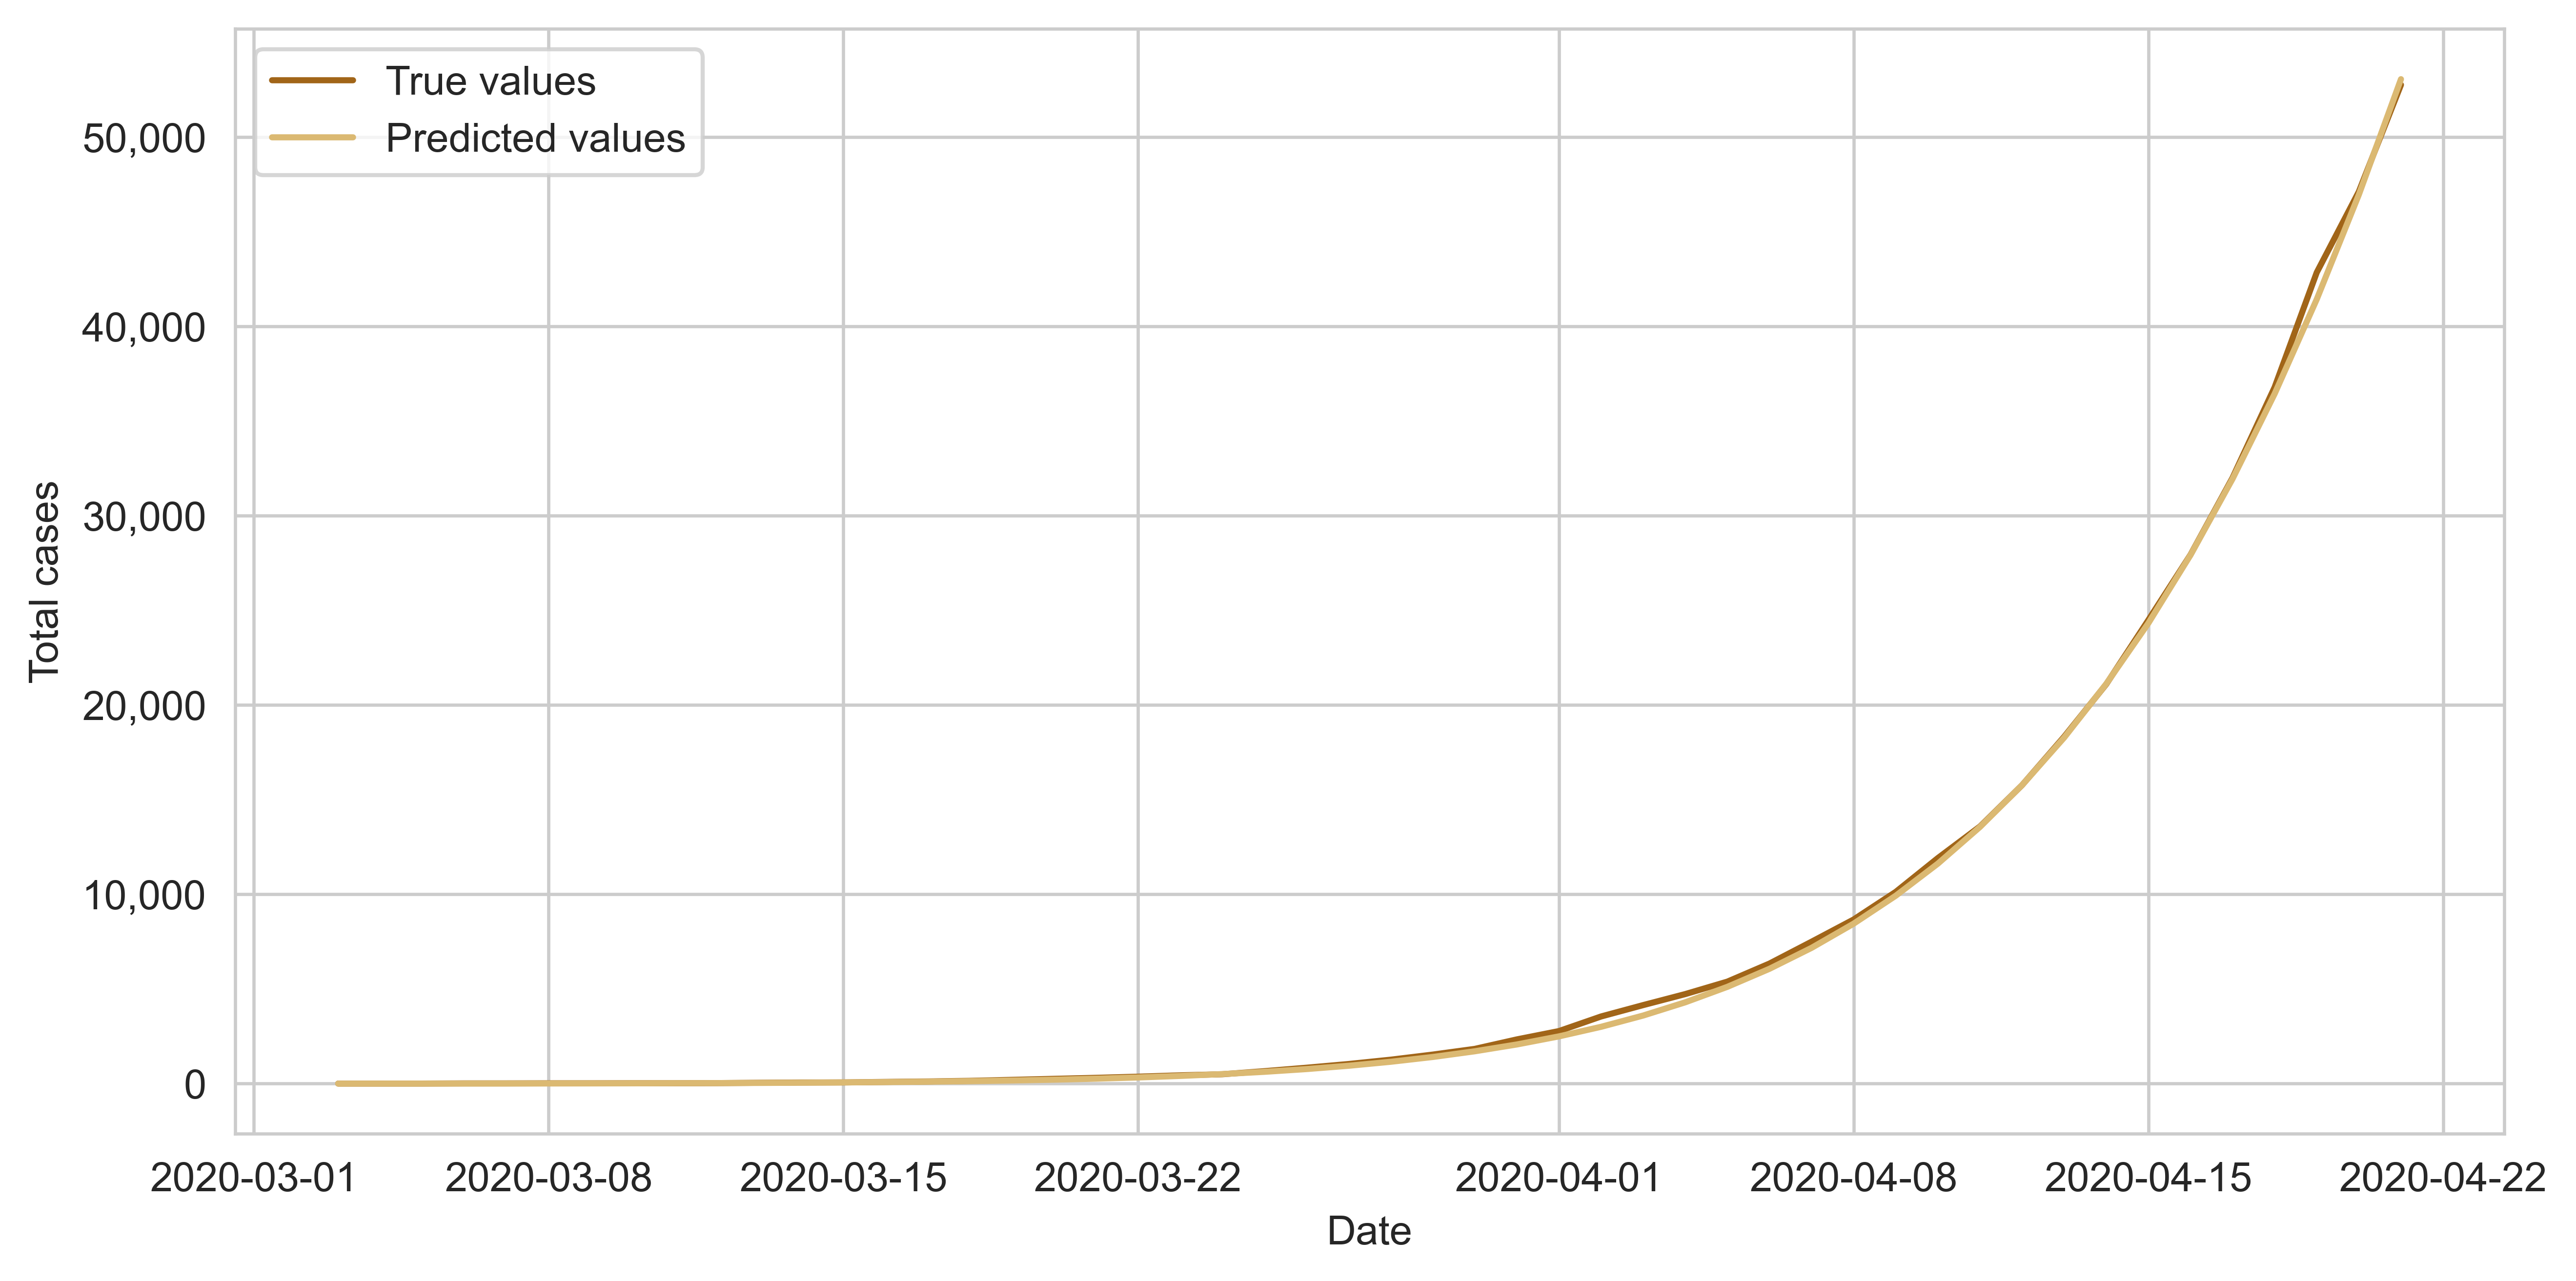

In [154]:
prediction = model.predict(x)

plt.figure(figsize=figsize)
plt.plot(train["date"], train["total_cases"], label="True values")
plt.plot(train["date"], np.exp(prediction).cumsum(),label="Predicted values")
plt.gca().yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
plt.xlabel("Date", size=10)
plt.ylabel("Total cases", size=10)
plt.legend(fontsize=10);

In [155]:
x = np.column_stack([np.ones_like(train["day"]), x])
sigma_noise = np.mean((y - prediction) ** 2)
mu, sigma = bayesian_update(np.zeros(3),1000 * np.eye(3), x, y, sigma_noise)

In [156]:
print(f"W mean:\n{mu}")
print(f"W variance:\n{sigma}")

W mean:
[-0.39658641  0.2756225  -0.00182979]
W variance:
[[ 9.52394107e-03 -7.69480531e-04  1.29542176e-05]
 [-7.69480531e-04  8.48437326e-05 -1.61928267e-06]
 [ 1.29542176e-05 -1.61928267e-06  3.30466208e-08]]


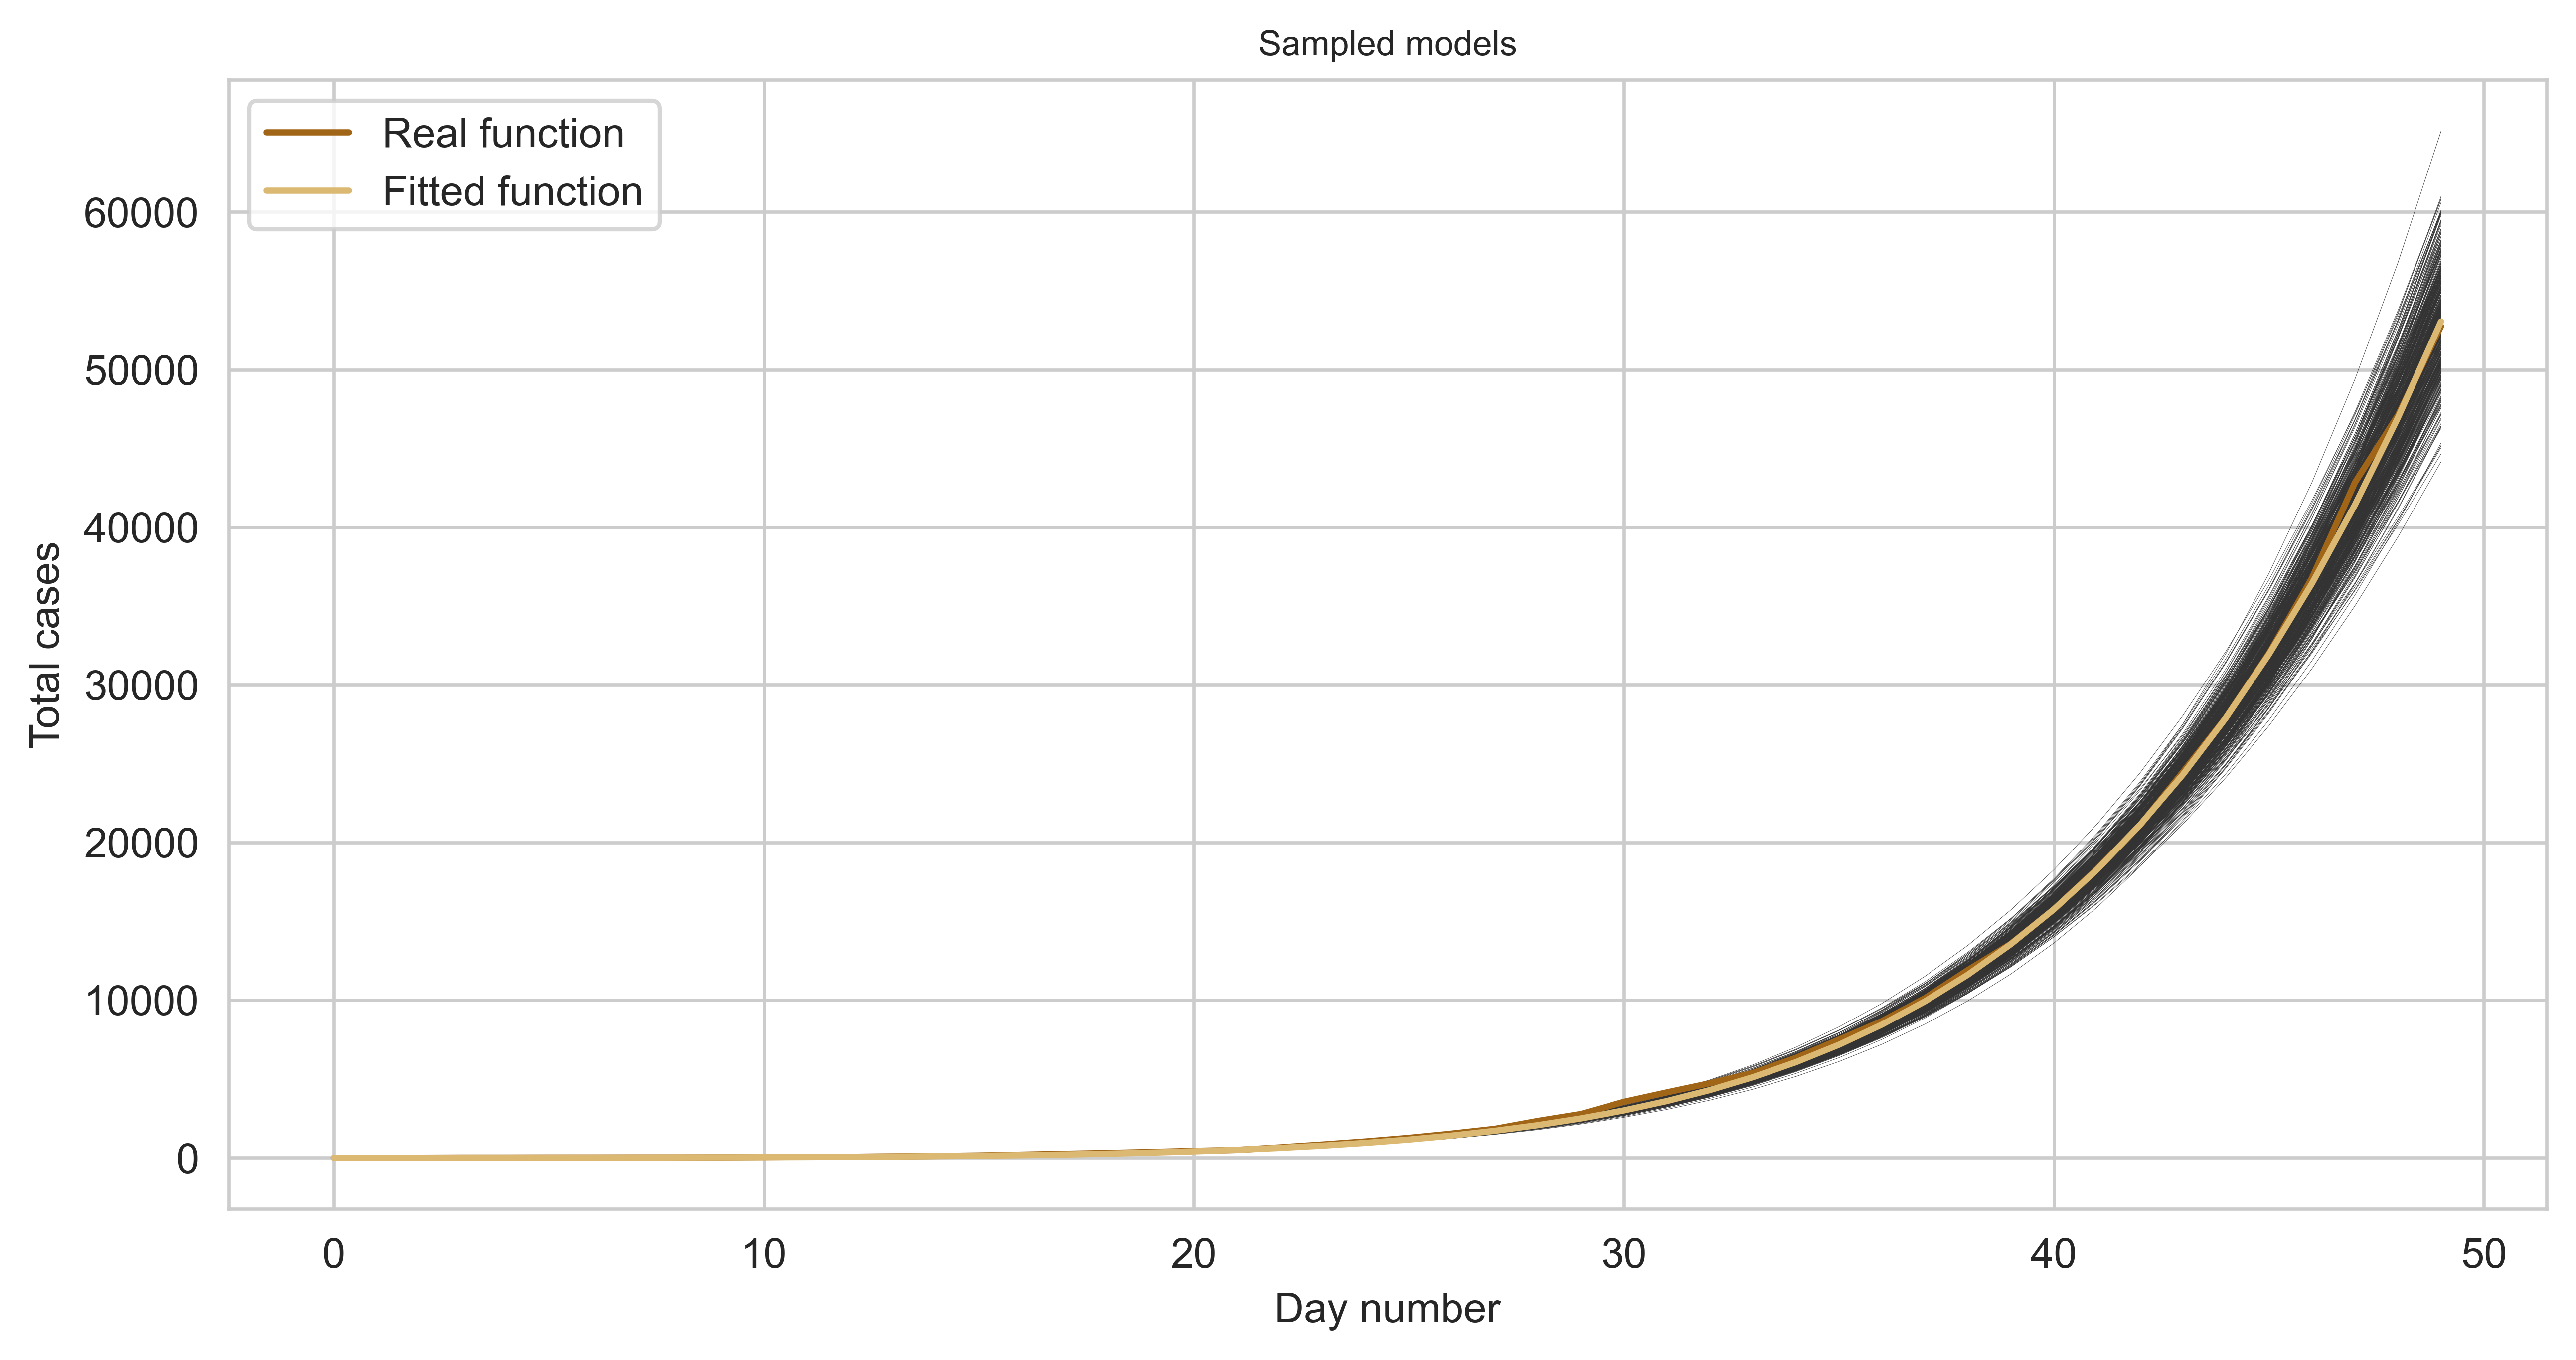

In [159]:
n_samples = 500
w = np.random.multivariate_normal(mu, sigma, n_samples)

plt.figure(figsize=figsize)
plt.title("Sampled models")
for i in range(n_samples):
    plt.plot(train["day"], np.exp(x.dot(w[i])).cumsum(),
             color="0.2", linewidth=.1)
plt.plot(train["day"], train["total_cases"], label="Real function", linewidth=1.5)
plt.plot(train["day"], np.exp(prediction).cumsum(),label="Fitted function", linewidth=1.5)
plt.xlabel("Day number", size=10)
plt.ylabel("Total cases", size=10)
plt.legend(fontsize=10);